In [1]:
import numpy as np
import pandas as pd 
from matplotlib import pyplot as plt
import seaborn as sns 
import plotly.figure_factory as ff
import plotly.express as px
import plotly.graph_objs as go
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import plotly.figure_factory as ff
import plotly.express as px
import plotly.graph_objs as go

In [2]:
df = pd.read_csv('chinareci.csv')
print(df.shape)
df.head()

(246, 42)


number  group  age  gender  education  familyincome  offender  SAVRY1  \
0  5010005      1   16       1        4.0             1         4       1   
1  3010071      1   18       1        8.0             1         4       2   
2  2010042      1   17       1        7.0             1         5       3   
3  3010047      1   17       1        5.0             1         4       3   
4  2010025      1   17       1        8.0             1         5       3   

   SAVRY2  SAVRY3  ...  SAVRY24    I  P1  P2  P3  P4  P5  P6  P  Reoffending  
0       2       2  ...        3  1.0   2   2   2   1   2   2  5            0  
1       1       1  ...        1  NaN   2   2   2   1   2   1  4            0  
2       2       2  ...        3  NaN   2   2   1   1   2   1  3            0  
3       2       3  ...        2  0.0   1   2   1   1   1   2  2            0  
4       1       1  ...        1  0.0   1   2   1   1   2   2  3            0  

[5 rows x 42 columns]

# ***Data Overview***

In [3]:
!pip install ydata-profiling

In [4]:
from ydata_profiling import ProfileReport

In [5]:
!pip install scikit-plot

In [6]:
 df.drop(['number', 'group','gender','H','S','I','P'], axis=1, inplace=True)

In [7]:
report = ProfileReport(df)
report

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [8]:
print(df.shape)

(246, 35)


# Data Preprocessing

In [9]:
# Summary Statistics for Numerical data:
df.describe()

age   education  familyincome    offender      SAVRY1  \
count  246.000000  245.000000    246.000000  246.000000  246.000000   
mean    16.764228    7.318367      2.585366    3.540650    2.560976   
std      0.982137    1.841203      0.951277    1.104894    0.665737   
min     14.000000    1.000000      0.000000    1.000000    1.000000   
25%     16.000000    7.000000      2.000000    3.000000    2.000000   
50%     17.000000    8.000000      2.500000    4.000000    3.000000   
75%     17.000000    9.000000      3.000000    4.000000    3.000000   
max     18.000000   11.000000      5.000000    5.000000    3.000000   

           SAVRY2      SAVRY3      SAVRY4      SAVRY5      SAVRY6  ...  \
count  246.000000  246.000000  246.000000  246.000000  246.000000  ...   
mean     1.922764    1.995935    1.682927    1.138211    1.686992  ...   
std      0.846439    0.785054    0.780550    0.400514    0.666696  ...   
min      1.000000    1.000000    1.000000    1.000000    1.000000  ...   
25%      1.000000    1.000000    1.000000    1.000000    1.000000  ...   
50%      2.000000    2.000000    1.000000    1.000000    2.000000  ...   
75%      3.000000    3.000000    2.000000    1.000000    2.000000  ...   
max      3.000000    3.000000    3.000000    3.000000    3.000000  ...   

          SAVRY22     SAVRY23     SAVRY24          P1          P2          P3  \
count  246.000000  246.000000  246.000000  246.000000  246.000000  246.000000   
mean     1.577236    1.930894    2.329268    1.345528    1.577236    1.430894   
std      0.664040    0.744573    0.783319    0.476510    0.495006    0.496211   
min      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   
25%      1.000000    1.000000    2.000000    1.000000    1.000000    1.000000   
50%      1.000000    2.000000    3.000000    1.000000    2.000000    1.000000   
75%      2.000000    2.000000    3.000000    2.000000    2.000000    2.000000   
max      3.000000    3.000000    3.000000    2.000000    2.000000    2.000000   

               P4          P5          P6  Reoffending  
count  246.000000  246.000000  246.000000   246.000000  
mean     1.491870    1.731707    1.369919     0.256098  
std      0.500953    0.443974    0.483767     0.437366  
min      1.000000    1.000000    1.000000     0.000000  
25%      1.000000    1.000000    1.000000     0.000000  
50%      1.000000    2.000000    1.000000     0.000000  
75%      2.000000    2.000000    2.000000     1.000000  
max      2.000000    2.000000    2.000000     1.000000  

[8 rows x 35 columns]

In [10]:
# use isnull().sum() to check for missing values 
df.isnull().sum() 

age             0
education       1
familyincome    0
offender        0
SAVRY1          0
SAVRY2          0
SAVRY3          0
SAVRY4          0
SAVRY5          0
SAVRY6          0
SAVRY7          0
SAVRY8          0
SAVRY9          0
SAVRY10         0
SAVRY11         0
SAVRY12         0
SAVRY13         0
SAVRY14         0
SAVRY15         0
SAVRY16         0
SAVRY17         0
SAVRY18         0
SAVRY19         0
SAVRY20         0
SAVRY21         0
SAVRY22         0
SAVRY23         0
SAVRY24         0
P1              0
P2              0
P3              0
P4              0
P5              0
P6              0
Reoffending     0
dtype: int64

In [11]:
df["education"] = df["education"].fillna(method='ffill')

In [12]:
df.isnull().sum() 

age             0
education       0
familyincome    0
offender        0
SAVRY1          0
SAVRY2          0
SAVRY3          0
SAVRY4          0
SAVRY5          0
SAVRY6          0
SAVRY7          0
SAVRY8          0
SAVRY9          0
SAVRY10         0
SAVRY11         0
SAVRY12         0
SAVRY13         0
SAVRY14         0
SAVRY15         0
SAVRY16         0
SAVRY17         0
SAVRY18         0
SAVRY19         0
SAVRY20         0
SAVRY21         0
SAVRY22         0
SAVRY23         0
SAVRY24         0
P1              0
P2              0
P3              0
P4              0
P5              0
P6              0
Reoffending     0
dtype: int64

In [13]:
df["Reoffending"].value_counts()

0    183
1     63
Name: Reoffending, dtype: int64

In [14]:
df.head()

age  education  familyincome  offender  SAVRY1  SAVRY2  SAVRY3  SAVRY4  \
0   16        4.0             1         4       1       2       2       1   
1   18        8.0             1         4       2       1       1       1   
2   17        7.0             1         5       3       2       2       2   
3   17        5.0             1         4       3       2       3       2   
4   17        8.0             1         5       3       1       1       2   

   SAVRY5  SAVRY6  ...  SAVRY22  SAVRY23  SAVRY24  P1  P2  P3  P4  P5  P6  \
0       1       1  ...        2        1        3   2   2   2   1   2   2   
1       1       1  ...        2        1        1   2   2   2   1   2   1   
2       1       1  ...        1        3        3   2   2   1   1   2   1   
3       2       1  ...        2        2        2   1   2   1   1   1   2   
4       1       2  ...        2        1        1   1   2   1   1   2   2   

   Reoffending  
0            0  
1            0  
2            0  
3            0  
4            0  

[5 rows x 35 columns]

# EDA

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

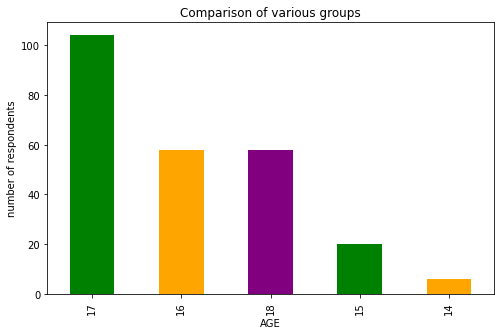

In [16]:

plt.subplots(figsize =(8,5))
df['age'].value_counts(normalize=True)
df['age'].value_counts(dropna = False).plot.bar(color =['green','orange','purple'])
plt.title('Comparison of various groups')
plt.xlabel('AGE')
plt.ylabel('number of respondents')
plt.show()

In [17]:
import numpy as np
import pandas as pd 
from matplotlib import pyplot as plt
import seaborn as sns 
import plotly.figure_factory as ff
import plotly.express as px
import plotly.graph_objs as go
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import plotly.figure_factory as ff
import plotly.express as px
import plotly.graph_objs as go

In [18]:
age_14= df[df['age']==14]
age_15= df[df['age']==15]
age_16= df[df['age']==16]
age_17= df[df['age']==17]
age_18 = df[df['age']==18]

labels = ['14','15','16','17','18']
values = [len(age_14), len(age_15),len(age_16),len(age_17),len(age_18)]

fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.4)])
fig.update_layout(
    title_text="Analysis on - Age")
fig.show()

<AxesSubplot:xlabel='Reoffending', ylabel='count'>

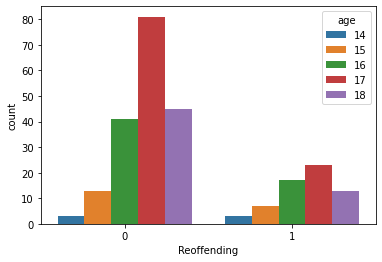

In [19]:
sns.countplot(x="Reoffending",data=df,hue="age")

In [20]:
low= df[df['SAVRY17']==1]
moderate = df[df['SAVRY17']==2]
high = df[df['SAVRY17']==3]

labels = ['Low','moderate','high']
values = [len(low), len(moderate),len(high)]

fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.4)])
fig.update_layout(
    title_text="Negative attitudes")
fig.show()

<AxesSubplot:xlabel='Reoffending', ylabel='count'>

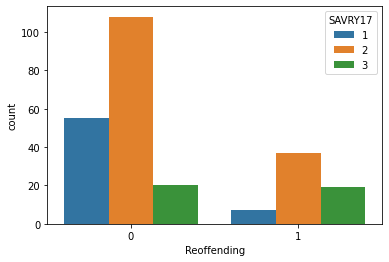

In [21]:
sns.countplot(x="Reoffending",data=df,hue="SAVRY17")

In [22]:
low= df[df['SAVRY4']==1]
moderate = df[df['SAVRY4']==2]
high = df[df['SAVRY4']==3]

labels = ['Low','moderate','high']
values = [len(low), len(moderate),len(high)]

fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.4)])
fig.update_layout(
    title_text="Past supervision failures")
fig.show()

<AxesSubplot:xlabel='Reoffending', ylabel='count'>

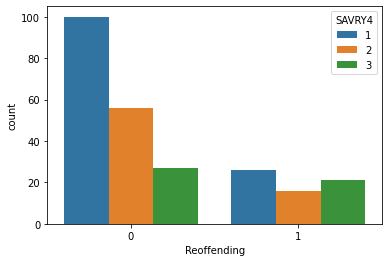

In [23]:
sns.countplot(x="Reoffending",data=df,hue="SAVRY4")

In [24]:
very_poor= df[df['familyincome']==1]
poor = df[df['familyincome']==2]
middle_class = df[df['familyincome']==3]
rich = df[df['familyincome']==4]
very_rich = df[df['familyincome']==5]
no_income = df[df['familyincome']==0]


labels = ['very poor','poor','middle class','rich','very rich','no income']
values = [len(very_poor), len(poor),len(middle_class),len(rich),len(very_rich),len(no_income)]

fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.4)])
fig.update_layout(
    title_text="Family income")
fig.show()

<AxesSubplot:xlabel='Reoffending', ylabel='count'>

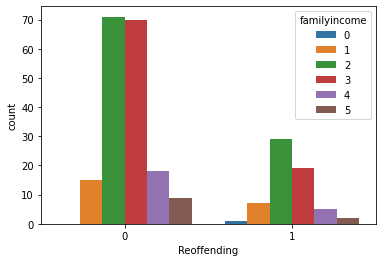

In [25]:
sns.countplot(x="Reoffending",data=df,hue="familyincome")

In [26]:
import plotly.graph_objects as go

# Create filtered data frames
filtered_dfs = []
filtered_dfs.append(df[df['education'] == 1.0])
filtered_dfs.append(df[df['education'] == 2.0])
filtered_dfs.append(df[df['education'] == 3.0])
filtered_dfs.append(df[df['education'] == 4.0])
filtered_dfs.append(df[df['education'] == 5.0])
filtered_dfs.append(df[df['education'] == 6.0])
filtered_dfs.append(df[df['education'] == 7.0])
filtered_dfs.append(df[df['education'] == 8.0])
filtered_dfs.append(df[df['education'] == 9.0])
filtered_dfs.append(df[df['education'] == 10.0])
filtered_dfs.append(df[df['education'] == 11.0])

# Compute the lengths of each filtered data frame
values = [len(filtered_df) for filtered_df in filtered_dfs]

# Define labels
labels = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11']

# Create the pie chart
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=0.4)])
fig.update_layout(title_text="Educational Background")
fig.show()


<AxesSubplot:xlabel='Reoffending', ylabel='count'>

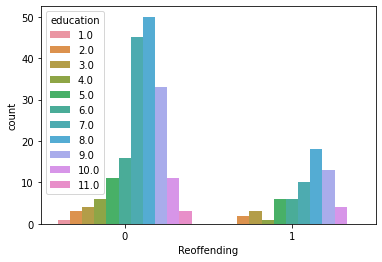

In [27]:
sns.countplot(x="Reoffending",data=df,hue="education")

In [28]:
low= df[df['SAVRY20']==1]
moderate = df[df['SAVRY20']==2]
high = df[df['SAVRY20']==3]

labels = ['Low','moderate','high']
values = [len(low), len(moderate),len(high)]

fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.4)])
fig.update_layout(
    title_text="Anger management problems")
fig.show()

<AxesSubplot:xlabel='Reoffending', ylabel='count'>

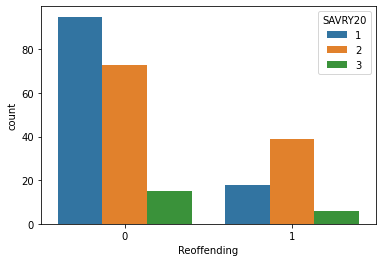

In [29]:
sns.countplot(x="Reoffending",data=df,hue="SAVRY20")

In [30]:
low= df[df['SAVRY24']==1]
moderate = df[df['SAVRY24']==2]
high = df[df['SAVRY24']==3]

labels = ['Low','moderate','high']
values = [len(low), len(moderate),len(high)]

fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.4)])
fig.update_layout(
    title_text="Low commitment to school or work")
fig.show()

<AxesSubplot:xlabel='Reoffending', ylabel='count'>

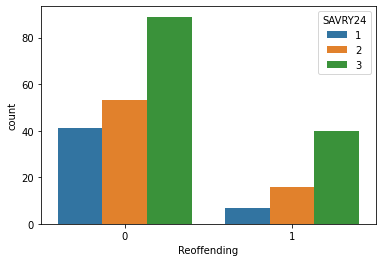

In [31]:
sns.countplot(x="Reoffending",data=df,hue="SAVRY24")

In [32]:
low= df[df['SAVRY2']==1]
moderate = df[df['SAVRY2']==2]
high = df[df['SAVRY2']==3]

labels = ['Low','moderate','high']
values = [len(low), len(moderate),len(high)]

fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.4)])
fig.update_layout(
    title_text="Analysis on non-violent offending")
fig.show()

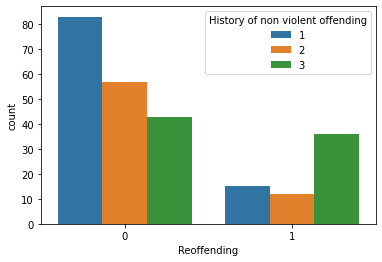

In [33]:
# Plot a countplot with customized hue label
sns.countplot(x="Reoffending", data=df, hue="SAVRY2")

# Set the customized hue label
plt.legend(title="History of non violent offending")

# Show the plot
plt.show()

In [34]:
low= df[df['SAVRY16']==1]
moderate =df[df['SAVRY16']==2]
high = df[df['SAVRY16']==3]

labels = ['Low','moderate','high']
values = [len(low), len(moderate),len(high)]

fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.4)])
fig.update_layout(
    title_text="Community of disorganization")
fig.show()

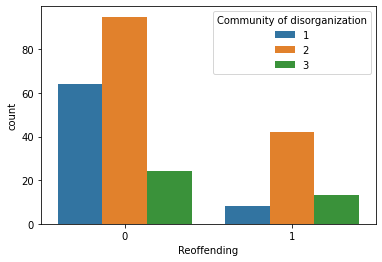

In [35]:
import seaborn as sns

# Plot a countplot with customized hue label
sns.countplot(x="Reoffending", data=df, hue="SAVRY16")

# Set the customized hue label
plt.legend(title="Community of disorganization")

# Show the plot
plt.show()

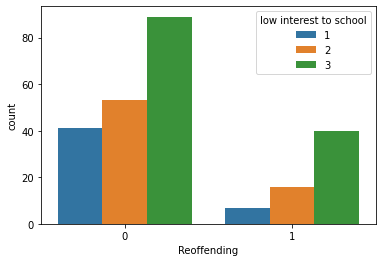

In [36]:
import seaborn as sns

# Plot a countplot with customized hue label
sns.countplot(x="Reoffending", data=df, hue="SAVRY24")

# Set the customized hue label
plt.legend(title="low interest to school")

# Show the plot
plt.show()


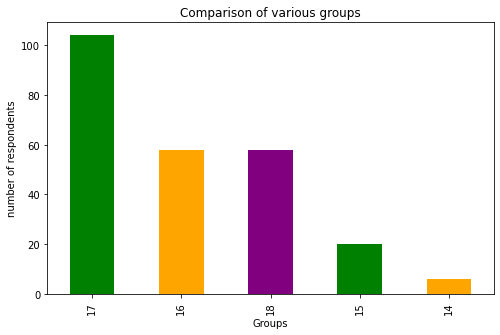

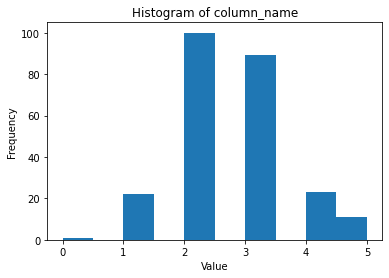

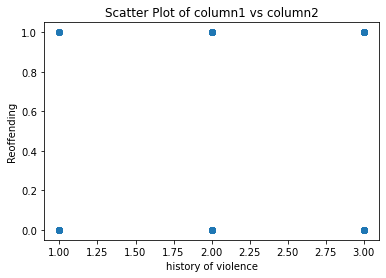

ValueError: Could not interpret input 'category_column'

In [37]:



plt.subplots(figsize =(8,5))
df['age'].value_counts(normalize=True)
df['age'].value_counts(dropna = False).plot.bar(color =['green','orange','purple'])
plt.title('Comparison of various groups')
plt.xlabel('Groups')
plt.ylabel('number of respondents')
plt.show()

# Data Visualization
# Histogram
plt.hist(df['familyincome'], bins=10)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of column_name')
plt.show()

# Scatter Plot
plt.scatter(df['SAVRY1'], df['Reoffending'])
plt.xlabel('history of violence')
plt.ylabel('Reoffending')
plt.title('Scatter Plot of column1 vs column2')
plt.show()

# Box Plot
sns.boxplot(x='category_column', y='numeric_column', data=df)
plt.xlabel('Category')
plt.ylabel('Numeric Column')
plt.title('Box Plot of numeric_column by category_column')
plt.show()

# Bar Chart
plt.figure(figsize=(10, 6))
sns.countplot(x='category_column', data=df)
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Bar Chart of category_column')
plt.show()

# Correlation Matrix Heatmap
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

# Outlier Detection (Box Plot)
sns.boxplot(df['numeric_column'])
plt.xlabel('Numeric Column')
plt.title('Box Plot of numeric_column (Outlier Detection)')
plt.show()

# Data Transformation (Scaling)
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df['scaled_column'] = scaler.fit_transform(df['column'])

# Dimensionality Reduction (PCA)
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_result = pca.fit_transform(df[['column1', 'column2']])
df['pca1'] = pca_result[:, 0]
df['pca2'] = pca_result[:, 1]

# Hypothesis Testing (t-test)
from scipy.stats import ttest_ind

group1 = df[df['group'] == 'A']['numeric_column']
group2 = df[df['group'] == 'B']['numeric_column']

t_stat, p_value = ttest_ind(group1, group2)
print('T-Statistic:', t_stat)
print('P-Value:', p_value)


In [38]:
# Separate the independent (X) and dependent (y) features
X = df.drop(columns = 'Reoffending')
y = df['Reoffending']

# Random Oversampling

In [39]:
! pip install -U imbalanced-learn

<AxesSubplot:ylabel='Reoffending'>

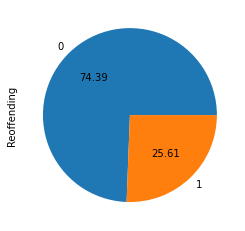

In [40]:
# Show pie plot (Approach 1)
y.value_counts().plot.pie(autopct='%.2f')

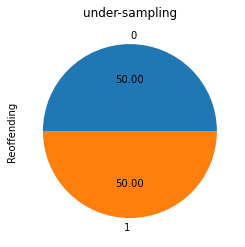

In [41]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(sampling_strategy='majority')  # String
X_res, y_res = rus.fit_resample(X, y)


ax = y_res.value_counts().plot.pie(autopct='%.2f')
_ = ax.set_title("under-sampling")

In [42]:
y_res.value_counts()

0    63
1    63
Name: Reoffending, dtype: int64

# Train - Test Split (under Sampling)

In [43]:
from sklearn.model_selection import train_test_split
X_train_oversampling, X_test_oversampling, y_train_oversampling, y_test_oversampling = train_test_split(X_res, y_res, test_size = 0.2, random_state = 20)

# Normalization (Min-Max Scaling)

In [44]:
from sklearn.preprocessing import MinMaxScaler
# Initialize the MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train_oversampling)
X_train_scaled_oversampling = scaler.transform(X_train_oversampling)
X_test_scaled_oversampling = scaler.transform(X_test_oversampling)

In [45]:
X_train_scaled_oversampling = pd.DataFrame(X_train_scaled_oversampling, columns=X_train_oversampling.columns)
X_test_scaled_oversampling = pd.DataFrame(X_test_scaled_oversampling, columns=X_test_oversampling.columns)

In [46]:
np.round(X_train_oversampling.describe(), 1)

age  education  familyincome  offender  SAVRY1  SAVRY2  SAVRY3  \
count  100.0      100.0         100.0     100.0   100.0   100.0   100.0   
mean    16.7        7.2           2.5       3.5     2.6     2.0     2.0   
std      1.1        2.0           0.9       1.2     0.7     0.9     0.8   
min     14.0        2.0           0.0       1.0     1.0     1.0     1.0   
25%     16.0        6.0           2.0       2.0     2.0     1.0     1.0   
50%     17.0        8.0           3.0       4.0     3.0     2.0     2.0   
75%     17.0        9.0           3.0       4.0     3.0     3.0     3.0   
max     18.0       11.0           5.0       5.0     3.0     3.0     3.0   

       SAVRY4  SAVRY5  SAVRY6  ...  SAVRY21  SAVRY22  SAVRY23  SAVRY24     P1  \
count   100.0   100.0   100.0  ...    100.0    100.0    100.0    100.0  100.0   
mean      1.7     1.1     1.7  ...      1.7      1.7      2.0      2.4    1.4   
std       0.8     0.4     0.7  ...      0.6      0.7      0.7      0.8    0.5   
min       1.0     1.0     1.0  ...      1.0      1.0      1.0      1.0    1.0   
25%       1.0     1.0     1.0  ...      1.0      1.0      2.0      2.0    1.0   
50%       1.0     1.0     2.0  ...      2.0      2.0      2.0      3.0    1.0   
75%       2.0     1.0     2.0  ...      2.0      2.0      2.2      3.0    2.0   
max       3.0     3.0     3.0  ...      3.0      3.0      3.0      3.0    2.0   

          P2     P3     P4     P5     P6  
count  100.0  100.0  100.0  100.0  100.0  
mean     1.7    1.5    1.5    1.8    1.4  
std      0.5    0.5    0.5    0.4    0.5  
min      1.0    1.0    1.0    1.0    1.0  
25%      1.0    1.0    1.0    2.0    1.0  
50%      2.0    1.5    2.0    2.0    1.0  
75%      2.0    2.0    2.0    2.0    2.0  
max      2.0    2.0    2.0    2.0    2.0  

[8 rows x 34 columns]

In [47]:
np.round(X_train_scaled_oversampling.describe(), 1)

age  education  familyincome  offender  SAVRY1  SAVRY2  SAVRY3  \
count  100.0      100.0         100.0     100.0   100.0   100.0   100.0   
mean     0.7        0.6           0.5       0.6     0.8     0.5     0.5   
std      0.3        0.2           0.2       0.3     0.3     0.4     0.4   
min      0.0        0.0           0.0       0.0     0.0     0.0     0.0   
25%      0.5        0.4           0.4       0.2     0.5     0.0     0.0   
50%      0.8        0.7           0.6       0.8     1.0     0.5     0.5   
75%      0.8        0.8           0.6       0.8     1.0     1.0     1.0   
max      1.0        1.0           1.0       1.0     1.0     1.0     1.0   

       SAVRY4  SAVRY5  SAVRY6  ...  SAVRY21  SAVRY22  SAVRY23  SAVRY24     P1  \
count   100.0   100.0   100.0  ...    100.0    100.0    100.0    100.0  100.0   
mean      0.3     0.1     0.4  ...      0.4      0.3      0.5      0.7    0.4   
std       0.4     0.2     0.3  ...      0.3      0.4      0.4      0.4    0.5   
min       0.0     0.0     0.0  ...      0.0      0.0      0.0      0.0    0.0   
25%       0.0     0.0     0.0  ...      0.0      0.0      0.5      0.5    0.0   
50%       0.0     0.0     0.5  ...      0.5      0.5      0.5      1.0    0.0   
75%       0.5     0.0     0.5  ...      0.5      0.5      0.6      1.0    1.0   
max       1.0     1.0     1.0  ...      1.0      1.0      1.0      1.0    1.0   

          P2     P3     P4     P5     P6  
count  100.0  100.0  100.0  100.0  100.0  
mean     0.7    0.5    0.5    0.8    0.4  
std      0.5    0.5    0.5    0.4    0.5  
min      0.0    0.0    0.0    0.0    0.0  
25%      0.0    0.0    0.0    1.0    0.0  
50%      1.0    0.5    1.0    1.0    0.0  
75%      1.0    1.0    1.0    1.0    1.0  
max      1.0    1.0    1.0    1.0    1.0  

[8 rows x 34 columns]

In [48]:
np.round(X_test_scaled_oversampling.describe(), 1)

age  education  familyincome  offender  SAVRY1  SAVRY2  SAVRY3  \
count  26.0       26.0          26.0      26.0    26.0    26.0    26.0   
mean    0.7        0.6           0.5       0.7     0.9     0.6     0.7   
std     0.2        0.2           0.2       0.3     0.3     0.4     0.3   
min     0.2        0.1           0.2       0.2     0.0     0.0     0.0   
25%     0.5        0.6           0.4       0.6     1.0     0.0     0.5   
50%     0.8        0.7           0.4       0.8     1.0     0.8     0.8   
75%     0.8        0.8           0.6       0.8     1.0     1.0     1.0   
max     1.0        0.9           0.8       1.0     1.0     1.0     1.0   

       SAVRY4  SAVRY5  SAVRY6  ...  SAVRY21  SAVRY22  SAVRY23  SAVRY24    P1  \
count    26.0    26.0    26.0  ...     26.0     26.0     26.0     26.0  26.0   
mean      0.5     0.1     0.4  ...      0.4      0.4      0.4      0.6   0.3   
std       0.4     0.2     0.4  ...      0.3      0.4      0.4      0.4   0.5   
min       0.0     0.0     0.0  ...      0.0      0.0      0.0      0.0   0.0   
25%       0.0     0.0     0.0  ...      0.1      0.0      0.0      0.5   0.0   
50%       0.5     0.0     0.5  ...      0.5      0.5      0.5      0.5   0.0   
75%       1.0     0.0     0.5  ...      0.5      0.5      0.5      1.0   1.0   
max       1.0     1.0     1.0  ...      1.0      1.0      1.0      1.0   1.0   

         P2    P3    P4    P5    P6  
count  26.0  26.0  26.0  26.0  26.0  
mean    0.5   0.5   0.5   0.7   0.3  
std     0.5   0.5   0.5   0.5   0.5  
min     0.0   0.0   0.0   0.0   0.0  
25%     0.0   0.0   0.0   0.0   0.0  
50%     0.0   0.0   0.0   1.0   0.0  
75%     1.0   1.0   1.0   1.0   0.8  
max     1.0   1.0   1.0   1.0   1.0  

[8 rows x 34 columns]

In [49]:
X_test_scaled_oversampling.head(10)

age  education  familyincome  offender  SAVRY1  SAVRY2  SAVRY3  SAVRY4  \
0  0.75   0.666667           0.8      0.75     0.0     0.0     0.0     0.0   
1  0.50   0.777778           0.8      0.75     1.0     0.5     1.0     0.0   
2  1.00   0.888889           0.4      0.50     1.0     0.0     1.0     0.0   
3  0.75   0.333333           0.4      1.00     1.0     0.5     0.5     0.5   
4  0.25   0.444444           0.2      0.75     1.0     0.0     1.0     0.0   
5  0.75   0.666667           0.6      0.75     1.0     1.0     1.0     1.0   
6  0.75   0.666667           0.8      0.75     1.0     1.0     1.0     1.0   
7  1.00   0.777778           0.4      0.25     1.0     0.0     0.5     0.5   
8  0.50   0.666667           0.4      1.00     1.0     1.0     1.0     1.0   
9  0.50   0.111111           0.4      0.25     1.0     1.0     1.0     1.0   

   SAVRY5  SAVRY6  ...  SAVRY21  SAVRY22  SAVRY23  SAVRY24   P1   P2   P3  \
0     0.0     0.0  ...      0.5      0.5      0.0      1.0  0.0  0.0  0.0   
1     0.0     0.5  ...      0.5      0.5      0.0      0.5  0.0  0.0  0.0   
2     0.5     1.0  ...      0.0      0.0      0.0      1.0  0.0  0.0  1.0   
3     0.0     0.0  ...      0.5      0.5      0.5      1.0  1.0  0.0  0.0   
4     0.0     0.0  ...      0.0      0.5      0.0      1.0  0.0  1.0  0.0   
5     0.0     0.0  ...      0.5      1.0      0.5      0.0  0.0  0.0  0.0   
6     0.0     0.5  ...      1.0      0.0      0.5      1.0  0.0  0.0  0.0   
7     0.0     0.5  ...      0.0      0.5      1.0      0.5  1.0  1.0  1.0   
8     0.5     0.5  ...      1.0      0.5      1.0      0.5  0.0  0.0  0.0   
9     0.0     1.0  ...      0.5      0.5      0.0      0.0  0.0  1.0  1.0   

    P4   P5   P6  
0  0.0  1.0  0.0  
1  0.0  1.0  0.0  
2  0.0  0.0  0.0  
3  0.0  0.0  0.0  
4  0.0  1.0  0.0  
5  1.0  0.0  0.0  
6  1.0  1.0  0.0  
7  1.0  0.0  0.0  
8  1.0  1.0  0.0  
9  0.0  1.0  0.0  

[10 rows x 34 columns]

In [50]:
# Replace null values with a small non-zero value
small_nonzero_value = 1e-10
data_filled = X_test_scaled_oversampling.fillna(small_nonzero_value)
data_filled = X_train_scaled_oversampling.fillna(small_nonzero_value)

In [51]:
X_train_scaled_oversampling.head(10)

age  education  familyincome  offender  SAVRY1  SAVRY2  SAVRY3  SAVRY4  \
0  0.75   0.888889           0.6      0.25     1.0     1.0     0.5     0.0   
1  0.50   0.666667           0.6      0.75     1.0     1.0     0.5     0.0   
2  1.00   0.777778           0.6      0.75     1.0     0.0     0.0     0.5   
3  0.75   0.555556           0.2      0.75     0.5     0.5     0.5     0.0   
4  0.50   0.666667           0.4      0.50     1.0     0.0     0.5     1.0   
5  0.50   0.666667           0.6      0.25     1.0     0.0     0.0     0.0   
6  0.75   0.555556           0.4      0.25     1.0     0.0     1.0     0.5   
7  0.75   1.000000           0.8      0.00     0.0     0.5     0.5     0.0   
8  1.00   0.666667           0.8      0.75     1.0     1.0     0.0     0.5   
9  0.50   0.666667           0.2      0.75     1.0     1.0     1.0     0.0   

   SAVRY5  SAVRY6  ...  SAVRY21  SAVRY22  SAVRY23  SAVRY24   P1   P2   P3  \
0     0.0     0.5  ...      0.5      0.5      0.5      0.5  0.0  0.0  0.0   
1     0.0     0.5  ...      0.5      0.0      0.0      0.0  0.0  0.0  0.0   
2     1.0     1.0  ...      0.5      0.5      0.5      1.0  0.0  1.0  1.0   
3     0.0     0.0  ...      0.0      0.0      1.0      0.0  0.0  1.0  1.0   
4     0.0     0.5  ...      0.0      0.5      0.5      0.5  0.0  0.0  0.0   
5     0.0     1.0  ...      0.0      0.5      0.0      0.0  1.0  1.0  0.0   
6     0.0     0.5  ...      0.5      0.5      0.5      1.0  1.0  1.0  0.0   
7     0.0     0.0  ...      0.0      0.0      0.0      0.5  0.0  0.0  0.0   
8     0.0     0.5  ...      0.5      0.0      0.5      1.0  0.0  1.0  1.0   
9     0.0     0.0  ...      0.5      0.0      0.0      1.0  0.0  1.0  0.0   

    P4   P5   P6  
0  0.0  1.0  0.0  
1  0.0  1.0  0.0  
2  1.0  0.0  0.0  
3  1.0  1.0  0.0  
4  0.0  0.0  0.0  
5  1.0  0.0  1.0  
6  0.0  0.0  0.0  
7  0.0  1.0  0.0  
8  1.0  1.0  0.0  
9  0.0  1.0  0.0  

[10 rows x 34 columns]

In [52]:
X_train_scaled_oversampling.isnull().sum() 

age             0
education       0
familyincome    0
offender        0
SAVRY1          0
SAVRY2          0
SAVRY3          0
SAVRY4          0
SAVRY5          0
SAVRY6          0
SAVRY7          0
SAVRY8          0
SAVRY9          0
SAVRY10         0
SAVRY11         0
SAVRY12         0
SAVRY13         0
SAVRY14         0
SAVRY15         0
SAVRY16         0
SAVRY17         0
SAVRY18         0
SAVRY19         0
SAVRY20         0
SAVRY21         0
SAVRY22         0
SAVRY23         0
SAVRY24         0
P1              0
P2              0
P3              0
P4              0
P5              0
P6              0
dtype: int64

In [53]:
X_test_scaled_oversampling.head(10)

age  education  familyincome  offender  SAVRY1  SAVRY2  SAVRY3  SAVRY4  \
0  0.75   0.666667           0.8      0.75     0.0     0.0     0.0     0.0   
1  0.50   0.777778           0.8      0.75     1.0     0.5     1.0     0.0   
2  1.00   0.888889           0.4      0.50     1.0     0.0     1.0     0.0   
3  0.75   0.333333           0.4      1.00     1.0     0.5     0.5     0.5   
4  0.25   0.444444           0.2      0.75     1.0     0.0     1.0     0.0   
5  0.75   0.666667           0.6      0.75     1.0     1.0     1.0     1.0   
6  0.75   0.666667           0.8      0.75     1.0     1.0     1.0     1.0   
7  1.00   0.777778           0.4      0.25     1.0     0.0     0.5     0.5   
8  0.50   0.666667           0.4      1.00     1.0     1.0     1.0     1.0   
9  0.50   0.111111           0.4      0.25     1.0     1.0     1.0     1.0   

   SAVRY5  SAVRY6  ...  SAVRY21  SAVRY22  SAVRY23  SAVRY24   P1   P2   P3  \
0     0.0     0.0  ...      0.5      0.5      0.0      1.0  0.0  0.0  0.0   
1     0.0     0.5  ...      0.5      0.5      0.0      0.5  0.0  0.0  0.0   
2     0.5     1.0  ...      0.0      0.0      0.0      1.0  0.0  0.0  1.0   
3     0.0     0.0  ...      0.5      0.5      0.5      1.0  1.0  0.0  0.0   
4     0.0     0.0  ...      0.0      0.5      0.0      1.0  0.0  1.0  0.0   
5     0.0     0.0  ...      0.5      1.0      0.5      0.0  0.0  0.0  0.0   
6     0.0     0.5  ...      1.0      0.0      0.5      1.0  0.0  0.0  0.0   
7     0.0     0.5  ...      0.0      0.5      1.0      0.5  1.0  1.0  1.0   
8     0.5     0.5  ...      1.0      0.5      1.0      0.5  0.0  0.0  0.0   
9     0.0     1.0  ...      0.5      0.5      0.0      0.0  0.0  1.0  1.0   

    P4   P5   P6  
0  0.0  1.0  0.0  
1  0.0  1.0  0.0  
2  0.0  0.0  0.0  
3  0.0  0.0  0.0  
4  0.0  1.0  0.0  
5  1.0  0.0  0.0  
6  1.0  1.0  0.0  
7  1.0  0.0  0.0  
8  1.0  1.0  0.0  
9  0.0  1.0  0.0  

[10 rows x 34 columns]

In [54]:
X_test_scaled_oversampling.isnull().sum() 

age             0
education       0
familyincome    0
offender        0
SAVRY1          0
SAVRY2          0
SAVRY3          0
SAVRY4          0
SAVRY5          0
SAVRY6          0
SAVRY7          0
SAVRY8          0
SAVRY9          0
SAVRY10         0
SAVRY11         0
SAVRY12         0
SAVRY13         0
SAVRY14         0
SAVRY15         0
SAVRY16         0
SAVRY17         0
SAVRY18         0
SAVRY19         0
SAVRY20         0
SAVRY21         0
SAVRY22         0
SAVRY23         0
SAVRY24         0
P1              0
P2              0
P3              0
P4              0
P5              0
P6              0
dtype: int64

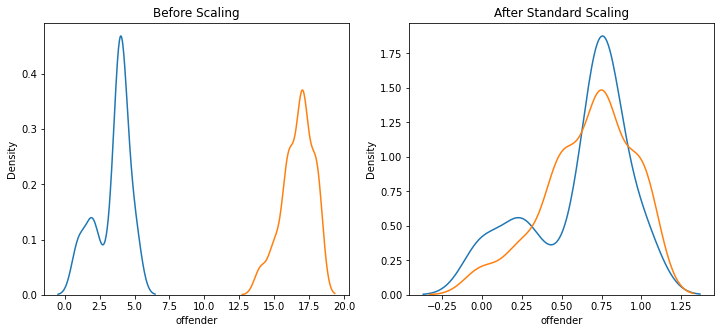

In [55]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train_oversampling['offender'], ax=ax1)
sns.kdeplot(X_train_oversampling['age'], ax=ax1)

# after scaling
ax2.set_title('After Standard Scaling')
sns.kdeplot(X_train_scaled_oversampling['offender'], ax=ax2)
sns.kdeplot(X_train_scaled_oversampling['age'], ax=ax2)
plt.show()

In [56]:

# Count the number of instances in each class after oversampling
value_counts_oversampled = pd.Series(y_res).value_counts()

# Print the number of instances in each class after oversampling
print("Class Distribution After Oversampling:")
print(value_counts_oversampled)

Class Distribution After Oversampling:
0    63
1    63
Name: Reoffending, dtype: int64


# ZeroR Classifier

In [57]:
from sklearn.dummy import DummyClassifier

In [58]:
# Creating an instance of DummyClassifier with strategy 'most_frequent'
z_classifier = DummyClassifier(strategy='most_frequent')

# Training the classifier on the training set
z_classifier.fit(X_train_scaled_oversampling, y_train_oversampling)

# Making predictions on the testing set
y_pred = z_classifier.predict(X_test_oversampling)


In [59]:
from sklearn.metrics import classification_report

In [60]:
# Print the classification report
print(classification_report(y_test_oversampling, y_pred))

              precision    recall  f1-score   support

           0       0.50      1.00      0.67        13
           1       0.00      0.00      0.00        13

    accuracy                           0.50        26
   macro avg       0.25      0.50      0.33        26
weighted avg       0.25      0.50      0.33        26



In [62]:
from sklearn.metrics import confusion_matrix

# Assuming you have true labels (y_true) and predicted labels (y_pred)





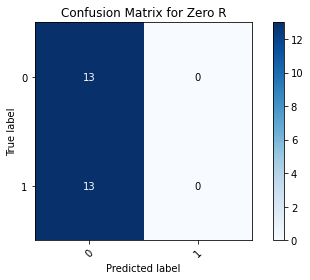

In [63]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(y_test_oversampling, y_pred)

# Define class labels
classes = ['0','1']

# Plot confusion matrix
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Zero R')
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

# Add labels to each cell
thresh = cm.max() / 2.0
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j], ha='center', va='center',
                 color='white' if cm[i, j] > thresh else 'black')

plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.tight_layout()
plt.show()


# ***Random Forest Classifier***

In [64]:
# import Random Forest classifier
from sklearn.ensemble import RandomForestClassifier

# instantiate the classifier 
rfc = RandomForestClassifier(max_depth=10)

# fit the model
rfc.fit(X_train_scaled_oversampling,y_train_oversampling)

# Predict the Test set results
y_pred = rfc.predict(X_test_scaled_oversampling)


# Print the classification report
print(classification_report(y_test_oversampling, y_pred))

              precision    recall  f1-score   support

           0       0.50      0.38      0.43        13
           1       0.50      0.62      0.55        13

    accuracy                           0.50        26
   macro avg       0.50      0.50      0.49        26
weighted avg       0.50      0.50      0.49        26



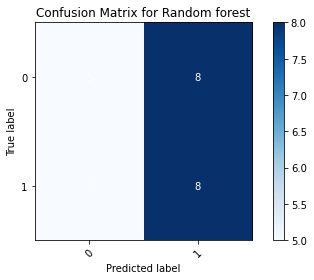

In [65]:
cm = confusion_matrix(y_test_oversampling, y_pred)

# Define class labels
classes = ['0','1']

# Plot confusion matrix
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Random forest')
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

# Add labels to each cell
thresh = cm.max() / 2.0
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j], ha='center', va='center',
                 color='white' if cm[i, j] > thresh else 'black')

plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.tight_layout()
plt.show()

# Error analysis : Investigate the level of overfitting

In [66]:
from sklearn.metrics import accuracy_score

In [67]:
rfc.fit(X_train_scaled_oversampling,y_train_oversampling)

# Make predictions on both the training and test sets
y_train_pred = rfc.predict(X_train_scaled_oversampling)
y_test_pred = rfc.predict(X_test_scaled_oversampling)

# Compute the accuracy scores for training and test sets
train_accuracy = accuracy_score(y_train_oversampling, y_train_pred)
test_accuracy = accuracy_score(y_test_oversampling, y_test_pred)

# Print the accuracy scores
print("Training Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

Training Accuracy: 1.0
Test Accuracy: 0.46153846153846156


# Random Forest Classifier with n_estimators 100

In [68]:
# instantiate the classifier with n_estimators = 100
rfc_100 = RandomForestClassifier(n_estimators=100, random_state=0)

# fit the model to the training set
rfc_100.fit(X_train_scaled_oversampling,y_train_oversampling)

# Predict on the test set results
y_pred_100 = rfc_100.predict(X_test_scaled_oversampling)

# Check accuracy score 
print('Model accuracy score with 100 decision-trees : {0:0.4f}'. format(accuracy_score(y_test_oversampling, y_pred_100)))

Model accuracy score with 100 decision-trees : 0.5385


In [69]:
# Print the classification report
print(classification_report(y_test_oversampling, y_pred_100))

              precision    recall  f1-score   support

           0       0.55      0.46      0.50        13
           1       0.53      0.62      0.57        13

    accuracy                           0.54        26
   macro avg       0.54      0.54      0.54        26
weighted avg       0.54      0.54      0.54        26



In [70]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(rfc_100.score(X_train_scaled_oversampling, y_train_oversampling)))

print('Test set score: {:.4f}'.format(rfc_100.score(X_test_scaled_oversampling, y_test_oversampling)))

Training set score: 1.0000
Test set score: 0.5385


# Calibration(A lower calibrated Brier score compared to the original Brier score indicates improved calibration performance)

In [71]:
!pip install --upgrade scikit-learn

In [72]:
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import brier_score_loss
from sklearn.calibration import calibration_curve
from sklearn.calibration import CalibrationDisplay

# Reliability diagram without calibration

Original Brier Score: 0.28377330046124566


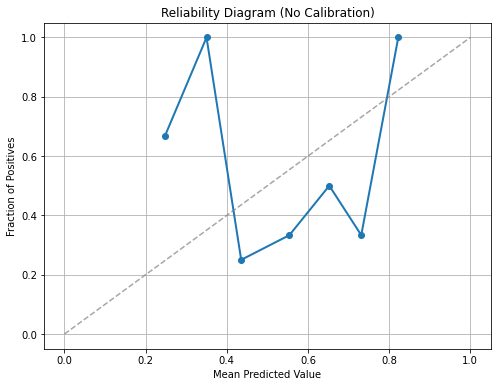

In [73]:
# Obtain the predicted probabilities from the model
y_pred_probs = rfc.predict_proba(X_test_scaled_oversampling)[:, 1]

# Calculate Brier score loss to evaluate calibration quality
original_brier_score = brier_score_loss(y_test_oversampling, y_pred_probs)

print("Original Brier Score:", original_brier_score)

# Compute the fraction of positives and the mean predicted value
fraction_of_positives, mean_predicted_value = calibration_curve(y_test_oversampling, y_pred_probs, n_bins=10)

# Plot reliability diagram
plt.figure(figsize=(8, 6))
plt.plot(mean_predicted_value, fraction_of_positives, marker='o', linewidth=2)
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', alpha=0.7)
plt.xlabel('Mean Predicted Value')
plt.ylabel('Fraction of Positives')
plt.title('Reliability Diagram (No Calibration)')
plt.grid(True)
plt.show()

# Reliability diagram after sigmoid calibration

Original Brier Score: 0.28377330046124566
Calibrated Brier Score: 0.3895606463348307


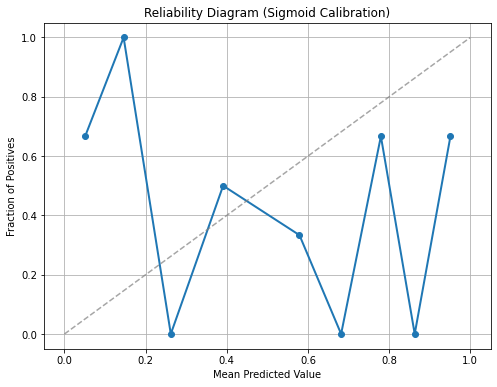

In [74]:
# Obtain the predicted probabilities from the model
y_pred_probs = rfc.predict_proba(X_test_scaled_oversampling)[:, 1]

# Perform isotonic calibration
calibrated_model = CalibratedClassifierCV(rfc, method='sigmoid', cv='prefit')
calibrated_model.fit(X_train_scaled_oversampling, y_train_oversampling)

# Obtain the calibrated predicted probabilities
calibrated_pred_probs = calibrated_model.predict_proba(X_test_scaled_oversampling)[:, 1]

# Calculate Brier score loss to evaluate calibration quality
original_brier_score = brier_score_loss(y_test_oversampling, y_pred_probs)
calibrated_brier_score = brier_score_loss(y_test_oversampling, calibrated_pred_probs)

print("Original Brier Score:", original_brier_score)
print("Calibrated Brier Score:", calibrated_brier_score)

# Compute the fraction of positives and the mean predicted value
fraction_of_positives, mean_predicted_value = calibration_curve(y_test_oversampling, calibrated_pred_probs, n_bins=10)

# Plot reliability diagram
plt.figure(figsize=(8, 6))
plt.plot(mean_predicted_value, fraction_of_positives, marker='o', linewidth=2)
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', alpha=0.7)
plt.xlabel('Mean Predicted Value')
plt.ylabel('Fraction of Positives')
plt.title('Reliability Diagram (Sigmoid Calibration)')
plt.grid(True)
plt.show()

# Reliability diagram after isotonic calibration

Original Brier Score: 0.28377330046124566
Calibrated Brier Score: 0.43167275425177115


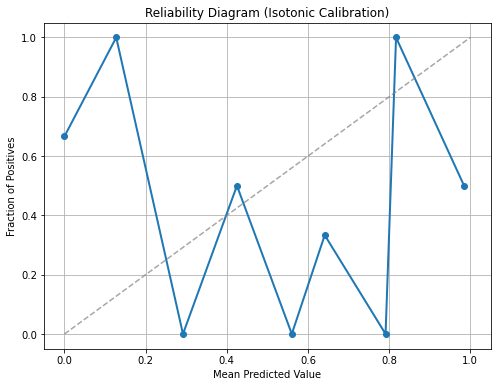

In [75]:
# Obtain the predicted probabilities from the model
y_pred_probs = rfc.predict_proba(X_test_scaled_oversampling)[:, 1]

# Perform isotonic calibration
calibrated_model = CalibratedClassifierCV(rfc, method='isotonic', cv='prefit')
calibrated_model.fit(X_train_scaled_oversampling, y_train_oversampling)

# Obtain the calibrated predicted probabilities
calibrated_pred_probs = calibrated_model.predict_proba(X_test_scaled_oversampling)[:, 1]

# Calculate Brier score loss to evaluate calibration quality
original_brier_score = brier_score_loss(y_test_oversampling, y_pred_probs)
calibrated_brier_score = brier_score_loss(y_test_oversampling, calibrated_pred_probs)

print("Original Brier Score:", original_brier_score)
print("Calibrated Brier Score:", calibrated_brier_score)

# Compute the fraction of positives and the mean predicted value
fraction_of_positives, mean_predicted_value = calibration_curve(y_test_oversampling, calibrated_pred_probs, n_bins=10)

# Plot reliability diagram
plt.figure(figsize=(8, 6))
plt.plot(mean_predicted_value, fraction_of_positives, marker='o', linewidth=2)
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', alpha=0.7)
plt.xlabel('Mean Predicted Value')
plt.ylabel('Fraction of Positives')
plt.title('Reliability Diagram (Isotonic Calibration)')
plt.grid(True)
plt.show()

# Feature importance 

In [76]:
# view the feature scores

feature_scores = pd.Series(rfc_100.feature_importances_, index=X_train_scaled_oversampling.columns).sort_values(ascending=False)
feature_scores

SAVRY2          0.095483
SAVRY23         0.048687
SAVRY16         0.047696
age             0.045893
education       0.042189
SAVRY18         0.040172
SAVRY20         0.038064
familyincome    0.036405
SAVRY14         0.035731
offender        0.034794
SAVRY4          0.033988
SAVRY17         0.032500
SAVRY19         0.031291
SAVRY24         0.031265
SAVRY7          0.029953
SAVRY22         0.028534
SAVRY3          0.028119
P6              0.027387
SAVRY6          0.025176
P4              0.025089
SAVRY11         0.024649
SAVRY21         0.022966
SAVRY12         0.021806
SAVRY10         0.021253
SAVRY1          0.020365
SAVRY9          0.019896
SAVRY13         0.019021
P1              0.016456
SAVRY15         0.016365
SAVRY8          0.016172
P2              0.015556
P3              0.010022
P5              0.008581
SAVRY5          0.008476
dtype: float64

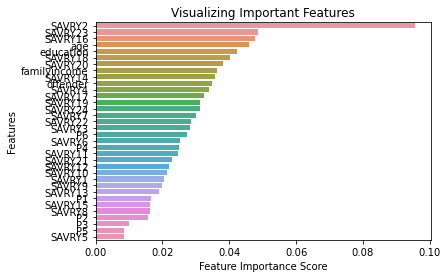

In [77]:
# Creating a seaborn bar plot

sns.barplot(x=feature_scores, y=feature_scores.index)

# Add labels to the graph

plt.xlabel('Feature Importance Score')

plt.ylabel('Features')

# Add title to the graph

plt.title("Visualizing Important Features")

# Visualize the graph

plt.show()

# Random Forest Classifier using randomized search CV

In [78]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report
from time import time

# Define the parameter distributions for the randomized search
param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}

# Create a Random Forest Classifier object
clf = RandomForestClassifier()

# Create a RandomizedSearchCV object with the specified number of iterations
n_iter_search = 20
rfc_random_search = RandomizedSearchCV(clf, param_distributions=param_dist, n_iter=n_iter_search)

# Fit the RandomizedSearchCV object to your data
start = time()
rfc_random_search.fit(X_train_scaled_oversampling, y_train_oversampling)
print("RandomizedSearchCV took %.2f seconds for %d candidates parameter settings." % ((time() - start), n_iter_search))

# Get the best estimator from the RandomizedSearchCV
best_estimator = rfc_random_search.best_estimator_

# Make predictions on the test data
y_pred = best_estimator.predict(X_test_scaled_oversampling)

# Print the classification report
print(classification_report(y_test_oversampling, y_pred))


RandomizedSearchCV took 29.24 seconds for 20 candidates parameter settings.
              precision    recall  f1-score   support

           0       0.50      0.38      0.43        13
           1       0.50      0.62      0.55        13

    accuracy                           0.50        26
   macro avg       0.50      0.50      0.49        26
weighted avg       0.50      0.50      0.49        26



# Random Forest Classifier using grid search CV

In [79]:
from sklearn.model_selection import GridSearchCV

In [80]:
rfc=RandomForestClassifier(random_state=42)

In [81]:
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

In [82]:
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train_scaled_oversampling, y_train_oversampling)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 500]})

In [83]:
CV_rfc.best_params_


{'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'auto',
 'n_estimators': 500}

In [84]:
rfc1=RandomForestClassifier(random_state=42, max_features='log2', n_estimators= 200, max_depth=5, criterion='gini')


In [85]:
rfc1.fit(X_train_scaled_oversampling, y_train_oversampling)

RandomForestClassifier(max_depth=5, max_features='log2', n_estimators=200,
                       random_state=42)

In [86]:
pred=rfc1.predict(X_test_scaled_oversampling)

In [87]:
print("Accuracy for Random Forest on CV data: ",accuracy_score(y_test_oversampling,pred))

Accuracy for Random Forest on CV data:  0.46153846153846156


In [88]:
# Print the classification report
print(classification_report(y_test_oversampling, pred))


              precision    recall  f1-score   support

           0       0.44      0.31      0.36        13
           1       0.47      0.62      0.53        13

    accuracy                           0.46        26
   macro avg       0.46      0.46      0.45        26
weighted avg       0.46      0.46      0.45        26



# Random Forest Classifier using hyperopt

# Random Forest Classifier using bayesian optimization

In [89]:
!pip install bayesian-optimization


In [90]:
from sklearn.model_selection import cross_val_score

from bayes_opt import BayesianOptimization

# Assuming you have feature data 'X' and target data 'y'

# Define the evaluation function for Bayesian Optimization
def evaluate_model(n_estimators, max_depth, min_samples_split):
    # Create a Random Forest classifier with the specified hyperparameters
    model = rfc

    # Perform cross-validation with 5 folds
    scores = cross_val_score(model, X_train_scaled_oversampling, y_train_oversampling, cv=5, scoring='accuracy')

    # Return the average accuracy score
    return scores.mean()

# Define the parameter ranges for Bayesian Optimization
param_ranges = {
    'n_estimators': (10, 1000),
    'max_depth': (1, 50),
    'min_samples_split': (2, 10)
}

# Perform Bayesian Optimization
optimizer = BayesianOptimization(evaluate_model, param_ranges)
optimizer.maximize(n_iter=10, init_points=5)

# Get the best hyperparameters
best_params = optimizer.max['params']
best_n_estimators = best_params['n_estimators']
best_max_depth = best_params['max_depth']
best_min_samples_split = best_params['min_samples_split']

# Train the final model with the best hyperparameters
final_model = RandomForestClassifier(
    n_estimators=int(best_n_estimators),
    max_depth=int(best_max_depth),
    min_samples_split=int(best_min_samples_split)
)
final_model.fit(X_train_scaled_oversampling, y_train_oversampling)
from sklearn.metrics import classification_report

# Generate predictions
y_pred = final_model.predict(X_train_scaled_oversampling)

# Generate the classification report
report = classification_report(y_train_oversampling, y_pred)
print(report)

|   iter    |  target   | max_depth | min_sa... | n_esti... |
-------------------------------------------------------------
| 1         | 0.64      | 30.61     | 4.354     | 613.6     |
| 2         | 0.64      | 8.519     | 4.688     | 825.7     |
| 3         | 0.64      | 8.265     | 6.828     | 505.7     |
| 4         | 0.64      | 48.05     | 7.445     | 238.1     |
| 5         | 0.64      | 15.01     | 6.346     | 506.0     |
| 6         | 0.64      | 1.03      | 4.833     | 11.37     |
| 7         | 0.64      | 29.96     | 5.109     | 727.8     |
| 8         | 0.64      | 35.71     | 3.616     | 112.9     |
| 9         | 0.64      | 49.87     | 2.089     | 990.6     |
| 10        | 0.64      | 49.88     | 3.377     | 12.65     |
| 11        | 0.64      | 1.059     | 5.817     | 993.3     |
| 12        | 0.64      | 22.71     | 3.819     | 421.4     |
| 13        | 0.64      | 17.32     | 3.014     | 20.24     |
| 14        | 0.64      | 48.58     | 9.374     | 992.1     |
| 15    

# Random Forest Classifier using Tpot classifier

In [91]:
!pip install tpot

In [92]:
!pip install --upgrade scikit-learn

In [93]:
#!pip uninstall scikit-learn

In [94]:
#!pip install scikit-learn

In [95]:
from tpot import TPOTClassifier


In [96]:
tpot = TPOTClassifier(generations=5, population_size=20, verbosity=2)
tpot.fit(X_train_scaled_oversampling, y_train_oversampling)

Optimization Progress:   0%|          | 0/120 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.6699999999999999

Generation 2 - Current best internal CV score: 0.6900000000000001

Generation 3 - Current best internal CV score: 0.6900000000000001

Generation 4 - Current best internal CV score: 0.6900000000000001

Generation 5 - Current best internal CV score: 0.6900000000000001

Best pipeline: ExtraTreesClassifier(ExtraTreesClassifier(input_matrix, bootstrap=False, criterion=entropy, max_features=0.9500000000000001, min_samples_leaf=18, min_samples_split=8, n_estimators=100), bootstrap=True, criterion=gini, max_features=0.5, min_samples_leaf=12, min_samples_split=17, n_estimators=100)


TPOTClassifier(generations=5, population_size=20, verbosity=2)

In [97]:
from sklearn.metrics import classification_report

# Assuming you have already fitted your TPOT classifier and have test data (X_test, y_test)

# Predict the labels for the test data
y_pred = tpot.predict(X_test_scaled_oversampling)

# Generate the classification report
report = classification_report(y_test_oversampling, y_pred)

# Print the classification report
print(report)


              precision    recall  f1-score   support

           0       0.58      0.54      0.56        13
           1       0.57      0.62      0.59        13

    accuracy                           0.58        26
   macro avg       0.58      0.58      0.58        26
weighted avg       0.58      0.58      0.58        26



# Random Forest Classifier using Optuna 

In [98]:
!pip install optuna

In [99]:
import optuna

In [100]:
def objective(trial):
    # Define the hyperparameters to tune
    n_estimators = trial.suggest_int("n_estimators", 100, 1000, step=100)
    max_depth = trial.suggest_int("max_depth", 3, 10)
    min_samples_split = trial.suggest_int("min_samples_split", 2, 10)
    min_samples_leaf = trial.suggest_int("min_samples_leaf", 1, 10)

    # Initialize and train the Random Forest Classifier
    clf = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        random_state=42,
    )
    clf.fit(X_train_scaled_oversampling, y_train_oversampling)

    # Evaluate the classifier on the validation set
    y_pred = clf.predict(X_test_oversampling)

    # Return the accuracy score as the objective value for Optuna to optimize
    return 1.0 - accuracy_score(y_test_oversampling, y_pred)


In [101]:
study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=100)

# Get the best hyperparameters found by Optuna
best_params = study.best_params


[I 2023-06-09 20:14:59,195] A new study created in memory with name: no-name-15399a12-c308-4bdf-b0df-32b7ef47ea48
[I 2023-06-09 20:14:59,535] Trial 0 finished with value: 0.5 and parameters: {'n_estimators': 200, 'max_depth': 10, 'min_samples_split': 10, 'min_samples_leaf': 4}. Best is trial 0 with value: 0.5.
[I 2023-06-09 20:15:01,064] Trial 1 finished with value: 0.5 and parameters: {'n_estimators': 1000, 'max_depth': 3, 'min_samples_split': 7, 'min_samples_leaf': 5}. Best is trial 0 with value: 0.5.
[I 2023-06-09 20:15:01,999] Trial 2 finished with value: 0.5 and parameters: {'n_estimators': 600, 'max_depth': 7, 'min_samples_split': 4, 'min_samples_leaf': 5}. Best is trial 0 with value: 0.5.
[I 2023-06-09 20:15:03,422] Trial 3 finished with value: 0.5 and parameters: {'n_estimators': 800, 'max_depth': 8, 'min_samples_split': 8, 'min_samples_leaf': 2}. Best is trial 0 with value: 0.5.
[I 2023-06-09 20:15:04,595] Trial 4 finished with value: 0.5 and parameters: {'n_estimators': 700, 

[I 2023-06-09 20:15:36,367] Trial 39 finished with value: 0.5 and parameters: {'n_estimators': 600, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 5}. Best is trial 0 with value: 0.5.
[I 2023-06-09 20:15:37,538] Trial 40 finished with value: 0.5 and parameters: {'n_estimators': 800, 'max_depth': 9, 'min_samples_split': 8, 'min_samples_leaf': 6}. Best is trial 0 with value: 0.5.
[I 2023-06-09 20:15:38,513] Trial 41 finished with value: 0.5 and parameters: {'n_estimators': 700, 'max_depth': 3, 'min_samples_split': 3, 'min_samples_leaf': 8}. Best is trial 0 with value: 0.5.
[I 2023-06-09 20:15:39,502] Trial 42 finished with value: 0.5 and parameters: {'n_estimators': 700, 'max_depth': 4, 'min_samples_split': 2, 'min_samples_leaf': 6}. Best is trial 0 with value: 0.5.
[I 2023-06-09 20:15:40,337] Trial 43 finished with value: 0.5 and parameters: {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 3, 'min_samples_leaf': 7}. Best is trial 0 with value: 0.5.
[I 2023-06-09 2

[I 2023-06-09 20:16:05,084] Trial 78 finished with value: 0.5 and parameters: {'n_estimators': 200, 'max_depth': 10, 'min_samples_split': 4, 'min_samples_leaf': 7}. Best is trial 0 with value: 0.5.
[I 2023-06-09 20:16:06,463] Trial 79 finished with value: 0.5 and parameters: {'n_estimators': 900, 'max_depth': 3, 'min_samples_split': 5, 'min_samples_leaf': 5}. Best is trial 0 with value: 0.5.
[I 2023-06-09 20:16:06,959] Trial 80 finished with value: 0.5 and parameters: {'n_estimators': 300, 'max_depth': 4, 'min_samples_split': 9, 'min_samples_leaf': 6}. Best is trial 0 with value: 0.5.
[I 2023-06-09 20:16:08,508] Trial 81 finished with value: 0.5 and parameters: {'n_estimators': 1000, 'max_depth': 4, 'min_samples_split': 8, 'min_samples_leaf': 5}. Best is trial 0 with value: 0.5.
[I 2023-06-09 20:16:09,963] Trial 82 finished with value: 0.5 and parameters: {'n_estimators': 1000, 'max_depth': 5, 'min_samples_split': 10, 'min_samples_leaf': 6}. Best is trial 0 with value: 0.5.
[I 2023-06-

In [102]:
best_clf = RandomForestClassifier(**best_params, random_state=42)
best_clf.fit(X_train_scaled_oversampling, y_train_oversampling)


RandomForestClassifier(max_depth=10, min_samples_leaf=4, min_samples_split=10,
                       n_estimators=200, random_state=42)

In [103]:
y_pred = best_clf.predict(X_test_scaled_oversampling)
report = classification_report(y_test_oversampling, y_pred)

print(report)


              precision    recall  f1-score   support

           0       0.50      0.38      0.43        13
           1       0.50      0.62      0.55        13

    accuracy                           0.50        26
   macro avg       0.50      0.50      0.49        26
weighted avg       0.50      0.50      0.49        26



# Logistic Regression

In [104]:
# train a logistic regression model on the training set
from sklearn.linear_model import LogisticRegression


# instantiate the model
logreg = LogisticRegression(solver='liblinear', random_state=0)


# fit the model
logreg.fit(X_train_scaled_oversampling,y_train_oversampling)

LogisticRegression(random_state=0, solver='liblinear')

In [105]:
y_pred_test = logreg.predict(X_test_scaled_oversampling)

y_pred_test

array([0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 0], dtype=int64)

In [106]:
# probability of getting output as 0 - not reoffending

logreg.predict_proba(X_test_scaled_oversampling)[:,0]

array([0.87156418, 0.89166256, 0.74005435, 0.67804171, 0.88732549,
       0.38949766, 0.22897858, 0.71458252, 0.12081593, 0.29838706,
       0.30233783, 0.29626007, 0.42770991, 0.30474243, 0.28871504,
       0.3383595 , 0.63237641, 0.32502657, 0.04771918, 0.93144209,
       0.75880332, 0.45002919, 0.26957265, 0.20207781, 0.93794244,
       0.89130126])

In [107]:
# probability of getting output as 1 - reoffending

logreg.predict_proba(X_test_scaled_oversampling)[:,1]

array([0.12843582, 0.10833744, 0.25994565, 0.32195829, 0.11267451,
       0.61050234, 0.77102142, 0.28541748, 0.87918407, 0.70161294,
       0.69766217, 0.70373993, 0.57229009, 0.69525757, 0.71128496,
       0.6616405 , 0.36762359, 0.67497343, 0.95228082, 0.06855791,
       0.24119668, 0.54997081, 0.73042735, 0.79792219, 0.06205756,
       0.10869874])

In [108]:
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test_oversampling, y_pred_test)))

Model accuracy score: 0.5385


In [109]:
y_pred_train = logreg.predict(X_train_scaled_oversampling)

y_pred_train

array([1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1], dtype=int64)

In [110]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train_oversampling, y_pred_train)))

Training-set accuracy score: 0.8000


In [111]:
# print the scores on training and test set(Check for overfitting and underfitting)

print('Training set score: {:.4f}'.format(logreg.score(X_train_scaled_oversampling, y_train_oversampling)))

print('Test set score: {:.4f}'.format(logreg.score(X_test_scaled_oversampling, y_test_oversampling)))

Training set score: 0.8000
Test set score: 0.5385


In [112]:
y_pred =logreg.predict(X_test_scaled_oversampling)

# Print the classification report
print(classification_report(y_test_oversampling, y_pred))


              precision    recall  f1-score   support

           0       0.55      0.46      0.50        13
           1       0.53      0.62      0.57        13

    accuracy                           0.54        26
   macro avg       0.54      0.54      0.54        26
weighted avg       0.54      0.54      0.54        26



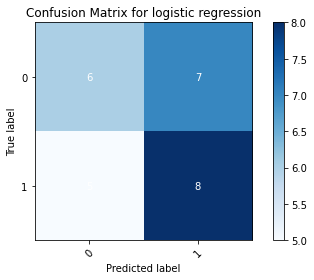

In [113]:
cm = confusion_matrix(y_test_oversampling, y_pred)

# Define class labels
classes = ['0','1']

# Plot confusion matrix
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix for logistic regression')
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

# Add labels to each cell
thresh = cm.max() / 2.0
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j], ha='center', va='center',
                 color='white' if cm[i, j] > thresh else 'black')

plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.tight_layout()
plt.show()

In [114]:
# fit the Logsitic Regression model with C=100

# instantiate the model
logreg100 = LogisticRegression(C=100, solver='liblinear', random_state=0)


# fit the model
logreg100.fit(X_train_scaled_oversampling, y_train_oversampling)

LogisticRegression(C=100, random_state=0, solver='liblinear')

In [115]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(logreg100.score(X_train_scaled_oversampling, y_train_oversampling)))

print('Test set score: {:.4f}'.format(logreg100.score(X_test_scaled_oversampling, y_test_oversampling)))

Training set score: 0.8900
Test set score: 0.5385


# LogisticRegression using GridSearch CV

In [116]:
from sklearn.model_selection import GridSearchCV


parameters = [{'penalty':['l1','l2']}, 
              {'C':[1, 10, 100, 1000]}]



log_grid_search = GridSearchCV(estimator = logreg,  
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 5,
                           verbose=0)


log_grid_search.fit(X_train_scaled_oversampling, y_train_oversampling)

GridSearchCV(cv=5,
             estimator=LogisticRegression(random_state=0, solver='liblinear'),
             param_grid=[{'penalty': ['l1', 'l2']}, {'C': [1, 10, 100, 1000]}],
             scoring='accuracy')

In [117]:
# examine the best model

# best score achieved during the GridSearchCV
print('GridSearch CV best score : {:.4f}\n\n'.format(log_grid_search.best_score_))

# print parameters that give the best results
print('Parameters that give the best results :','\n\n', (log_grid_search.best_params_))

# print estimator that was chosen by the GridSearch
print('\n\nEstimator that was chosen by the search :','\n\n', (log_grid_search.best_estimator_))

GridSearch CV best score : 0.6800


Parameters that give the best results : 

 {'penalty': 'l1'}


Estimator that was chosen by the search : 

 LogisticRegression(penalty='l1', random_state=0, solver='liblinear')


In [118]:
# calculate GridSearch CV score on test set

print('GridSearch CV score on test set: {0:0.4f}'.format(log_grid_search.score(X_test_scaled_oversampling, y_test_oversampling)))

GridSearch CV score on test set: 0.6538


In [119]:
y_pred = log_grid_search.predict(X_test_scaled_oversampling)

# Print the classification report
print(classification_report(y_test_oversampling, y_pred))


              precision    recall  f1-score   support

           0       0.67      0.62      0.64        13
           1       0.64      0.69      0.67        13

    accuracy                           0.65        26
   macro avg       0.65      0.65      0.65        26
weighted avg       0.65      0.65      0.65        26



# LogisticRegression using randomized search CV

In [120]:
max_iter = range(100, 500)
solver = ['lbfgs', 'newton-cg', 'liblinear']
warm_start = [True, False]
C = np.arange(0, 1, 0.01)
random_grid ={
    'max_iter' : max_iter,
    'warm_start' : warm_start,
    'solver' : solver,
    'C' : C,
}

In [121]:
random_estimator = RandomizedSearchCV(estimator = logreg,
                                   param_distributions = random_grid,
                                   n_iter = 100,
                                   scoring = 'accuracy',
                                   n_jobs = -1,
                                   verbose = 1, 
                                   random_state = 1,
                                  )

random_estimator.fit(X_test_scaled_oversampling, y_test_oversampling)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(estimator=LogisticRegression(random_state=0,
                                                solver='liblinear'),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'C': array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,...
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99]),
                                        'max_iter': range(100, 500),
                                        'solver': ['lbfgs', 'newton-cg',
                                                   'liblinear'],
                                        'warm_start': [True, False]},
                   random_state=1, scoring='accuracy', verbose=1)

In [122]:
random_estimator.best_params_

best_estimator = random_estimator.best_estimator_

best_estimator.fit(X_test_scaled_oversampling, y_test_oversampling)

pred = best_estimator.predict(X_test_scaled_oversampling)

accuracy_score(pred, y_test_oversampling)

0.6923076923076923

In [123]:
from sklearn.metrics import classification_report

print(classification_report(y_test_oversampling,pred))

              precision    recall  f1-score   support

           0       0.69      0.69      0.69        13
           1       0.69      0.69      0.69        13

    accuracy                           0.69        26
   macro avg       0.69      0.69      0.69        26
weighted avg       0.69      0.69      0.69        26



In [124]:
from sklearn import metrics

In [125]:
from sklearn.metrics import accuracy_score, confusion_matrix

Test score: 0.69
Cohen Kappa score: 0.38


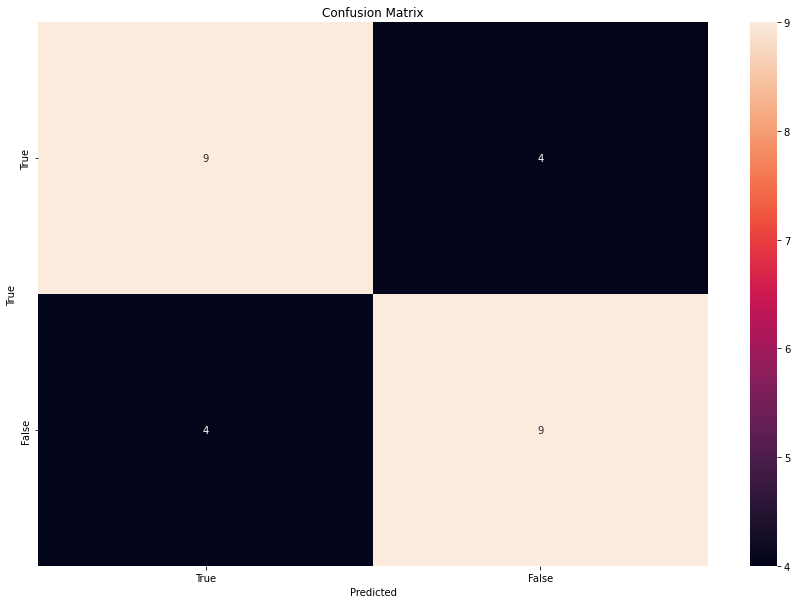

In [126]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import cohen_kappa_score

predicted = best_estimator.predict(X_test_scaled_oversampling)
print("Test score: {:.2f}".format(accuracy_score(y_test_oversampling,predicted)))
print("Cohen Kappa score: {:.2f}".format(cohen_kappa_score(y_test_oversampling,predicted)))
plt.figure(figsize=(15,10))
ax = sns.heatmap(confusion_matrix(y_test_oversampling,predicted),annot=True)
ax = ax.set(xlabel='Predicted',ylabel='True',title='Confusion Matrix',
            xticklabels=(['True', 'False']),
            yticklabels=(['True', 'False']))

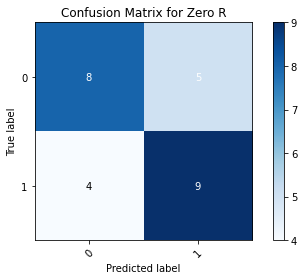

In [127]:
cm = confusion_matrix(y_test_oversampling, y_pred)

# Define class labels
classes = ['0','1']

# Plot confusion matrix
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Zero R')
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

# Add labels to each cell
thresh = cm.max() / 2.0
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j], ha='center', va='center',
                 color='white' if cm[i, j] > thresh else 'black')

plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.tight_layout()
plt.show()

# LogisticRegression using optuna

In [128]:
import optuna


def objective(trial):
    # Define the hyperparameters to tune
    C = trial.suggest_loguniform("C", 1e-5, 1e5)
    penalty = trial.suggest_categorical("penalty", ["l1", "l2"])
    solver = trial.suggest_categorical("solver", ["liblinear", "saga"])
    max_iter = trial.suggest_int("max_iter", 100, 1000)

    # Initialize and train the Logistic Regression model
    clf = LogisticRegression(
        C=C, penalty=penalty, solver=solver, max_iter=max_iter, random_state=42
    )
    clf.fit(X_train_scaled_oversampling, y_train_oversampling)

    # Evaluate the classifier on the validation set
    y_pred = clf.predict(X_test_scaled_oversampling)

    # Return the accuracy score as the objective value for Optuna to optimize
    return 1.0 - (y_pred == y_test_oversampling).mean()

# Run the optimization process
study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=100)

# Get the best hyperparameters found by Optuna
best_params = study.best_params

# Train the Logistic Regression model with the best hyperparameters
best_clf = LogisticRegression(**best_params, random_state=42)
best_clf.fit(X_train_scaled_oversampling, y_train_oversampling)

# Generate the classification report
y_pred = best_clf.predict(X_test_scaled_oversampling)
report = classification_report(y_test_oversampling, y_pred)

print(report)


[I 2023-06-09 20:16:34,288] A new study created in memory with name: no-name-1534b050-0a01-4bfc-9db3-e2f540eb825f
[I 2023-06-09 20:16:34,297] Trial 0 finished with value: 0.5 and parameters: {'C': 0.015449528027272771, 'penalty': 'l2', 'solver': 'saga', 'max_iter': 933}. Best is trial 0 with value: 0.5.
[I 2023-06-09 20:16:34,339] Trial 1 finished with value: 0.46153846153846156 and parameters: {'C': 219.82843212376358, 'penalty': 'l1', 'solver': 'saga', 'max_iter': 682}. Best is trial 1 with value: 0.46153846153846156.
[I 2023-06-09 20:16:34,362] Trial 2 finished with value: 0.46153846153846156 and parameters: {'C': 33458.77837895563, 'penalty': 'l2', 'solver': 'saga', 'max_iter': 434}. Best is trial 1 with value: 0.46153846153846156.
[I 2023-06-09 20:16:34,369] Trial 3 finished with value: 0.5 and parameters: {'C': 0.009489235892381672, 'penalty': 'l1', 'solver': 'liblinear', 'max_iter': 293}. Best is trial 1 with value: 0.46153846153846156.
[I 2023-06-09 20:16:34,377] Trial 4 finish

[I 2023-06-09 20:16:35,779] Trial 35 finished with value: 0.46153846153846156 and parameters: {'C': 226.39571650417565, 'penalty': 'l1', 'solver': 'saga', 'max_iter': 725}. Best is trial 10 with value: 0.42307692307692313.
[I 2023-06-09 20:16:35,827] Trial 36 finished with value: 0.42307692307692313 and parameters: {'C': 67223.82168057494, 'penalty': 'l2', 'solver': 'saga', 'max_iter': 774}. Best is trial 10 with value: 0.42307692307692313.
[I 2023-06-09 20:16:35,850] Trial 37 finished with value: 0.42307692307692313 and parameters: {'C': 14575.303632281399, 'penalty': 'l1', 'solver': 'liblinear', 'max_iter': 647}. Best is trial 10 with value: 0.42307692307692313.
[I 2023-06-09 20:16:35,884] Trial 38 finished with value: 0.46153846153846156 and parameters: {'C': 69.64318272417935, 'penalty': 'l2', 'solver': 'saga', 'max_iter': 364}. Best is trial 10 with value: 0.42307692307692313.
[I 2023-06-09 20:16:35,934] Trial 39 finished with value: 0.46153846153846156 and parameters: {'C': 661.7

[I 2023-06-09 20:16:37,509] Trial 70 finished with value: 0.46153846153846156 and parameters: {'C': 184.63196649813503, 'penalty': 'l1', 'solver': 'saga', 'max_iter': 855}. Best is trial 10 with value: 0.42307692307692313.
[I 2023-06-09 20:16:37,574] Trial 71 finished with value: 0.42307692307692313 and parameters: {'C': 6157.950179222069, 'penalty': 'l1', 'solver': 'saga', 'max_iter': 828}. Best is trial 10 with value: 0.42307692307692313.
[I 2023-06-09 20:16:37,645] Trial 72 finished with value: 0.46153846153846156 and parameters: {'C': 16913.777618935736, 'penalty': 'l1', 'solver': 'saga', 'max_iter': 963}. Best is trial 10 with value: 0.42307692307692313.
[I 2023-06-09 20:16:37,704] Trial 73 finished with value: 0.42307692307692313 and parameters: {'C': 3363.872217236713, 'penalty': 'l1', 'solver': 'saga', 'max_iter': 721}. Best is trial 10 with value: 0.42307692307692313.
[I 2023-06-09 20:16:37,771] Trial 74 finished with value: 0.42307692307692313 and parameters: {'C': 1251.90000

              precision    recall  f1-score   support

           0       0.57      0.62      0.59        13
           1       0.58      0.54      0.56        13

    accuracy                           0.58        26
   macro avg       0.58      0.58      0.58        26
weighted avg       0.58      0.58      0.58        26



# LogisticRegression using Tpot classifier

In [129]:
from tpot import TPOTClassifier

# Create and fit the TPOT classifier
tpot = TPOTClassifier(generations=10, population_size=50, verbosity=2, random_state=42)
tpot.fit(X_train_scaled_oversampling, y_train_oversampling)

# Evaluate the best pipeline on the test set
y_pred = tpot.predict(X_test_scaled_oversampling)
report = classification_report(y_test_oversampling, y_pred)

print(report)


Optimization Progress:   0%|          | 0/550 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.6900000000000001

Generation 2 - Current best internal CV score: 0.6900000000000001

Generation 3 - Current best internal CV score: 0.6900000000000001

Generation 4 - Current best internal CV score: 0.6900000000000001

Generation 5 - Current best internal CV score: 0.6900000000000001

Generation 6 - Current best internal CV score: 0.7

Generation 7 - Current best internal CV score: 0.7

Generation 8 - Current best internal CV score: 0.7

Generation 9 - Current best internal CV score: 0.7

Generation 10 - Current best internal CV score: 0.71

Best pipeline: ExtraTreesClassifier(input_matrix, bootstrap=False, criterion=entropy, max_features=0.35000000000000003, min_samples_leaf=1, min_samples_split=14, n_estimators=100)
              precision    recall  f1-score   support

           0       0.50      0.38      0.43        13
           1       0.50      0.62      0.55        13

    accuracy                           0.50        26
   m

# Logistic regression using bayesian optimization

In [130]:
from bayes_opt import BayesianOptimization


# Define the objective function for Bayesian optimization
def objective(C, penalty, solver, max_iter):
    # Convert hyperparameters to their appropriate types
    C = 10 ** C
    penalty = 'l1' if penalty < 0.5 else 'l2'
    solver = 'liblinear' if solver < 0.5 else 'saga'
    max_iter = int(max_iter)

    # Create and train the Logistic Regression model with the given hyperparameters
    clf = LogisticRegression(C=C, penalty=penalty, solver=solver, max_iter=max_iter)
    clf.fit(X_train_scaled_oversampling, y_train_oversampling)

    # Evaluate the classifier on the validation set and return the negative accuracy
    y_pred = clf.predict(X_test_scaled_oversampling)
    accuracy = (y_pred == y_test_oversampling).mean()
    return -accuracy

# Define the search space for hyperparameters
pbounds = {
    'C': (-5, 2),
    'penalty': (0, 1),
    'solver': (0, 1),
    'max_iter': (100, 500)
}

# Perform Bayesian optimization
optimizer = BayesianOptimization(f=objective, pbounds=pbounds, random_state=42)
optimizer.maximize(init_points=10, n_iter=50)

# Get the best hyperparameters found by Bayesian optimization
best_params = optimizer.max['params']

# Train the Logistic Regression model with the best hyperparameters
best_C = 10 ** best_params['C']
best_penalty = 'l1' if best_params['penalty'] < 0.5 else 'l2'
best_solver = 'liblinear' if best_params['solver'] < 0.5 else 'saga'
best_max_iter = int(best_params['max_iter'])
best_clf = LogisticRegression(C=best_C, penalty=best_penalty, solver=best_solver, max_iter=best_max_iter)
best_clf.fit(X_train_scaled_oversampling, y_train_oversampling)

# Generate the classification report
y_pred = best_clf.predict(X_test_scaled_oversampling)
report = classification_report(y_test_oversampling, y_pred)

print(report)


|   iter    |  target   |     C     | max_iter  |  penalty  |  solver   |
-------------------------------------------------------------------------
| 1         | -0.4231   | -2.378    | 480.3     | 0.732     | 0.5987    |
| 2         | -0.5      | -3.908    | 162.4     | 0.05808   | 0.8662    |
| 3         | -0.5      | -0.7922   | 383.2     | 0.02058   | 0.9699    |
| 4         | -0.5385   | 0.8271    | 184.9     | 0.1818    | 0.1834    |
| 5         | -0.5      | -2.87     | 309.9     | 0.4319    | 0.2912    |
| 6         | -0.5      | -0.717    | 155.8     | 0.2921    | 0.3664    |
| 7         | -0.5      | -1.808    | 414.1     | 0.1997    | 0.5142    |
| 8         | -0.5385   | -0.8531   | 118.6     | 0.6075    | 0.1705    |
| 9         | -0.5      | -4.545    | 479.6     | 0.9656    | 0.8084    |
| 10        | -0.5      | -2.868    | 139.1     | 0.6842    | 0.4402    |
| 11        | -0.4231   | -2.246    | 480.3     | 0.7615    | 0.5727    |
| 12        | -0.5      | -2.601    | 

# k Nearest Neighbours

In [131]:
# import KNeighbors ClaSSifier from sklearn
from sklearn.neighbors import KNeighborsClassifier


# instantiate the model
knn = KNeighborsClassifier(n_neighbors=3)


# fit the model to the training set
knn.fit(X_train_scaled_oversampling, y_train_oversampling)

KNeighborsClassifier(n_neighbors=3)

In [132]:
y_pred = knn.predict(X_test_scaled_oversampling)

y_pred

array([0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 0], dtype=int64)

In [133]:
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test_oversampling, y_pred)))

Model accuracy score: 0.5385


In [134]:
y_pred_train = knn.predict(X_train_scaled_oversampling)

In [135]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train_oversampling, y_pred_train)))

Training-set accuracy score: 0.7300


In [136]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(knn.score(X_train_scaled_oversampling, y_train_oversampling)))

print('Test set score: {:.4f}'.format(knn.score(X_test_scaled_oversampling, y_test_oversampling)))

Training set score: 0.7300
Test set score: 0.5385


In [137]:
from sklearn.metrics import classification_report

print(classification_report(y_test_oversampling, y_pred))

              precision    recall  f1-score   support

           0       0.55      0.46      0.50        13
           1       0.53      0.62      0.57        13

    accuracy                           0.54        26
   macro avg       0.54      0.54      0.54        26
weighted avg       0.54      0.54      0.54        26



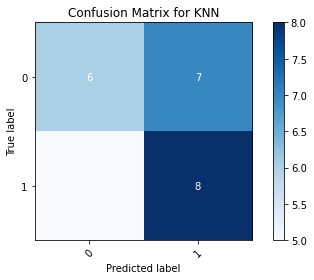

In [138]:
cm = confusion_matrix(y_test_oversampling, y_pred)

# Define class labels
classes = ['0','1']

# Plot confusion matrix
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix for KNN')
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

# Add labels to each cell
thresh = cm.max() / 2.0
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j], ha='center', va='center',
                 color='white' if cm[i, j] > thresh else 'black')

plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.tight_layout()
plt.show()

# KNN using randomized search CV

In [139]:
#Finding a best value of k for better accuracy
from sklearn import metrics
k_range=range(1,26)
scores=[]

for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled_oversampling,y_train_oversampling)
    y_pred=knn.predict(X_test_scaled_oversampling)
    scores.append(metrics.accuracy_score(y_test_oversampling, y_pred))

In [140]:
#Define the parameter values that should be searched
k_range=list(range(1,31))
options=['uniform', 'distance']

In [141]:
param_dist = dict(n_neighbors=k_range, weights=options)

In [142]:
#n_iter: Number of random combinations it would try
#random_state: Reproducibility/ Set seed

knn=KNeighborsClassifier()
rand = RandomizedSearchCV(knn, param_dist, cv=10, scoring='accuracy', n_iter=10, random_state=5)
rand.fit(X_train_scaled_oversampling,y_train_oversampling)

RandomizedSearchCV(cv=10, estimator=KNeighborsClassifier(),
                   param_distributions={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8,
                                                        9, 10, 11, 12, 13, 14,
                                                        15, 16, 17, 18, 19, 20,
                                                        21, 22, 23, 24, 25, 26,
                                                        27, 28, 29, 30],
                                        'weights': ['uniform', 'distance']},
                   random_state=5, scoring='accuracy')

In [143]:
print(rand.best_score_)
print(rand.best_params_)

0.66
{'weights': 'distance', 'n_neighbors': 10}


In [144]:
#Run RandomizedSearchCV 20 times (n_iter=10) and record the best score

best_scores=[]
for i in range(20):
    rand = RandomizedSearchCV(knn, param_dist, cv=10, scoring='accuracy', n_iter=10)
    rand.fit(X_train_scaled_oversampling,y_train_oversampling)
    best_scores.append(round(rand.best_score_,3))
print(best_scores)

[0.66, 0.65, 0.66, 0.65, 0.66, 0.65, 0.65, 0.66, 0.63, 0.65, 0.66, 0.63, 0.66, 0.66, 0.65, 0.65, 0.66, 0.65, 0.66, 0.66]


In [145]:
y_pred = rand.predict(X_test_scaled_oversampling)

# Print the classification report
print(classification_report(y_test_oversampling, y_pred))

              precision    recall  f1-score   support

           0       0.56      0.38      0.45        13
           1       0.53      0.69      0.60        13

    accuracy                           0.54        26
   macro avg       0.54      0.54      0.53        26
weighted avg       0.54      0.54      0.53        26



# KNN using Grid Search

In [146]:
knn = KNeighborsClassifier()

In [147]:
param_grid = {
    'n_neighbors': [3, 4, 5, 6, 7, 8, 9, 10],  # Example values for n_neighbors
    'weights': ['uniform', 'distance'],  # Example values for weights
    'p': [1, 2]  # Example values for p
}

In [148]:
knn_grid_search = GridSearchCV(knn, param_grid, scoring='accuracy')

In [149]:
knn_grid_search.fit(X_train_scaled_oversampling, y_train_oversampling)  # X_train and y_train are your training data

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 4, 5, 6, 7, 8, 9, 10], 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [150]:
best_params = knn_grid_search.best_params_
best_model = knn_grid_search.best_estimator_

In [151]:
y_pred = best_model.predict(X_test_scaled_oversampling)  # X_test is your test data

In [152]:
print(classification_report(y_test_oversampling, y_pred))

              precision    recall  f1-score   support

           0       0.60      0.46      0.52        13
           1       0.56      0.69      0.62        13

    accuracy                           0.58        26
   macro avg       0.58      0.58      0.57        26
weighted avg       0.58      0.58      0.57        26



# KNN using Optuna

In [153]:
def objective(trial):
    
    # Define the hyperparameters to optimize
    n_neighbors = trial.suggest_int("n_neighbors", 1, 10)
    weights = trial.suggest_categorical("weights", ["uniform", "distance"])

    # Create and train the KNN classifier
    knn = KNeighborsClassifier(n_neighbors=n_neighbors, weights=weights)
    knn.fit(X_train_scaled_oversampling, y_train_oversampling)

    # Predict on the validation set
    y_pred = knn.predict(X_test_scaled_oversampling)

    # Calculate classification report
    report = classification_report(y_test_oversampling, y_pred)

    return report

# Create an Optuna study and optimize the objective function
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=100)



[I 2023-06-09 20:23:48,629] A new study created in memory with name: no-name-b5a08b6f-4a54-4d89-baae-73eca9db0b81
[W 2023-06-09 20:23:48,671] Trial 0 failed with parameters: {'n_neighbors': 3, 'weights': 'uniform'} because of the following error: The value ' ' could not be cast to float..
[W 2023-06-09 20:23:48,671] Trial 0 failed with value '              precision    recall  f1-score   support\n\n           0       0.55      0.46      0.50        13\n           1       0.53      0.62      0.57        13\n\n    accuracy                           0.54        26\n   macro avg       0.54      0.54      0.54        26\nweighted avg       0.54      0.54      0.54        26\n'.
[W 2023-06-09 20:23:48,712] Trial 1 failed with parameters: {'n_neighbors': 4, 'weights': 'uniform'} because of the following error: The value ' ' could not be cast to float..
[W 2023-06-09 20:23:48,713] Trial 1 failed with value '              precision    recall  f1-score   support\n\n           0       0.54      0

[W 2023-06-09 20:23:49,273] Trial 14 failed with parameters: {'n_neighbors': 8, 'weights': 'uniform'} because of the following error: The value ' ' could not be cast to float..
[W 2023-06-09 20:23:49,274] Trial 14 failed with value '              precision    recall  f1-score   support\n\n           0       0.64      0.54      0.58        13\n           1       0.60      0.69      0.64        13\n\n    accuracy                           0.62        26\n   macro avg       0.62      0.62      0.61        26\nweighted avg       0.62      0.62      0.61        26\n'.
[W 2023-06-09 20:23:49,316] Trial 15 failed with parameters: {'n_neighbors': 7, 'weights': 'distance'} because of the following error: The value ' ' could not be cast to float..
[W 2023-06-09 20:23:49,316] Trial 15 failed with value '              precision    recall  f1-score   support\n\n           0       0.62      0.38      0.48        13\n           1       0.56      0.77      0.65        13\n\n    accuracy               

[W 2023-06-09 20:23:49,857] Trial 28 failed with parameters: {'n_neighbors': 8, 'weights': 'uniform'} because of the following error: The value ' ' could not be cast to float..
[W 2023-06-09 20:23:49,858] Trial 28 failed with value '              precision    recall  f1-score   support\n\n           0       0.64      0.54      0.58        13\n           1       0.60      0.69      0.64        13\n\n    accuracy                           0.62        26\n   macro avg       0.62      0.62      0.61        26\nweighted avg       0.62      0.62      0.61        26\n'.
[W 2023-06-09 20:23:49,900] Trial 29 failed with parameters: {'n_neighbors': 1, 'weights': 'distance'} because of the following error: The value ' ' could not be cast to float..
[W 2023-06-09 20:23:49,900] Trial 29 failed with value '              precision    recall  f1-score   support\n\n           0       0.60      0.46      0.52        13\n           1       0.56      0.69      0.62        13\n\n    accuracy               

[W 2023-06-09 20:23:50,456] Trial 42 failed with parameters: {'n_neighbors': 7, 'weights': 'uniform'} because of the following error: The value ' ' could not be cast to float..
[W 2023-06-09 20:23:50,457] Trial 42 failed with value '              precision    recall  f1-score   support\n\n           0       0.62      0.38      0.48        13\n           1       0.56      0.77      0.65        13\n\n    accuracy                           0.58        26\n   macro avg       0.59      0.58      0.56        26\nweighted avg       0.59      0.58      0.56        26\n'.
[W 2023-06-09 20:23:50,505] Trial 43 failed with parameters: {'n_neighbors': 8, 'weights': 'uniform'} because of the following error: The value ' ' could not be cast to float..
[W 2023-06-09 20:23:50,506] Trial 43 failed with value '              precision    recall  f1-score   support\n\n           0       0.64      0.54      0.58        13\n           1       0.60      0.69      0.64        13\n\n    accuracy                

[W 2023-06-09 20:23:51,120] Trial 56 failed with parameters: {'n_neighbors': 5, 'weights': 'distance'} because of the following error: The value ' ' could not be cast to float..
[W 2023-06-09 20:23:51,121] Trial 56 failed with value '              precision    recall  f1-score   support\n\n           0       0.50      0.38      0.43        13\n           1       0.50      0.62      0.55        13\n\n    accuracy                           0.50        26\n   macro avg       0.50      0.50      0.49        26\nweighted avg       0.50      0.50      0.49        26\n'.
[W 2023-06-09 20:23:51,166] Trial 57 failed with parameters: {'n_neighbors': 4, 'weights': 'distance'} because of the following error: The value ' ' could not be cast to float..
[W 2023-06-09 20:23:51,167] Trial 57 failed with value '              precision    recall  f1-score   support\n\n           0       0.50      0.38      0.43        13\n           1       0.50      0.62      0.55        13\n\n    accuracy              

[W 2023-06-09 20:23:51,740] Trial 70 failed with parameters: {'n_neighbors': 5, 'weights': 'distance'} because of the following error: The value ' ' could not be cast to float..
[W 2023-06-09 20:23:51,741] Trial 70 failed with value '              precision    recall  f1-score   support\n\n           0       0.50      0.38      0.43        13\n           1       0.50      0.62      0.55        13\n\n    accuracy                           0.50        26\n   macro avg       0.50      0.50      0.49        26\nweighted avg       0.50      0.50      0.49        26\n'.
[W 2023-06-09 20:23:51,788] Trial 71 failed with parameters: {'n_neighbors': 10, 'weights': 'distance'} because of the following error: The value ' ' could not be cast to float..
[W 2023-06-09 20:23:51,789] Trial 71 failed with value '              precision    recall  f1-score   support\n\n           0       0.62      0.38      0.48        13\n           1       0.56      0.77      0.65        13\n\n    accuracy             

[W 2023-06-09 20:23:52,378] Trial 84 failed with parameters: {'n_neighbors': 5, 'weights': 'distance'} because of the following error: The value ' ' could not be cast to float..
[W 2023-06-09 20:23:52,379] Trial 84 failed with value '              precision    recall  f1-score   support\n\n           0       0.50      0.38      0.43        13\n           1       0.50      0.62      0.55        13\n\n    accuracy                           0.50        26\n   macro avg       0.50      0.50      0.49        26\nweighted avg       0.50      0.50      0.49        26\n'.
[W 2023-06-09 20:23:52,423] Trial 85 failed with parameters: {'n_neighbors': 2, 'weights': 'distance'} because of the following error: The value ' ' could not be cast to float..
[W 2023-06-09 20:23:52,424] Trial 85 failed with value '              precision    recall  f1-score   support\n\n           0       0.60      0.46      0.52        13\n           1       0.56      0.69      0.62        13\n\n    accuracy              

[W 2023-06-09 20:23:53,034] Trial 98 failed with parameters: {'n_neighbors': 5, 'weights': 'distance'} because of the following error: The value ' ' could not be cast to float..
[W 2023-06-09 20:23:53,034] Trial 98 failed with value '              precision    recall  f1-score   support\n\n           0       0.50      0.38      0.43        13\n           1       0.50      0.62      0.55        13\n\n    accuracy                           0.50        26\n   macro avg       0.50      0.50      0.49        26\nweighted avg       0.50      0.50      0.49        26\n'.
[W 2023-06-09 20:23:53,077] Trial 99 failed with parameters: {'n_neighbors': 4, 'weights': 'uniform'} because of the following error: The value ' ' could not be cast to float..
[W 2023-06-09 20:23:53,078] Trial 99 failed with value '              precision    recall  f1-score   support\n\n           0       0.54      0.54      0.54        13\n           1       0.54      0.54      0.54        13\n\n    accuracy               

In [154]:
print(classification_report(y_test_oversampling, y_pred))


              precision    recall  f1-score   support

           0       0.60      0.46      0.52        13
           1       0.56      0.69      0.62        13

    accuracy                           0.58        26
   macro avg       0.58      0.58      0.57        26
weighted avg       0.58      0.58      0.57        26



# KNN using Tpot classifier

In [155]:
from tpot import TPOTClassifier

# Create and fit the TPOT classifier
tpot = TPOTClassifier(generations=5, population_size=50, verbosity=2)
tpot.fit(X_train_scaled_oversampling, y_train_oversampling)

# Generate predictions on the test data
y_pred = tpot.predict(X_test_scaled_oversampling)

# Generate the classification report
report = classification_report(y_test_oversampling, y_pred)

# Print the classification report
print("Classification Report:\n", report)


Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.7

Generation 2 - Current best internal CV score: 0.7

Generation 3 - Current best internal CV score: 0.7000000000000001

Generation 4 - Current best internal CV score: 0.72

Generation 5 - Current best internal CV score: 0.72

Best pipeline: GradientBoostingClassifier(SelectPercentile(input_matrix, percentile=64), learning_rate=0.5, max_depth=4, max_features=0.9500000000000001, min_samples_leaf=10, min_samples_split=14, n_estimators=100, subsample=0.9000000000000001)
Classification Report:
               precision    recall  f1-score   support

           0       0.45      0.38      0.42        13
           1       0.47      0.54      0.50        13

    accuracy                           0.46        26
   macro avg       0.46      0.46      0.46        26
weighted avg       0.46      0.46      0.46        26



# KNN using bayesian optimization

In [156]:
!pip install scikit-optimize

In [157]:

from skopt import BayesSearchCV


# Define the KNN classifier
knn = KNeighborsClassifier()

# Define the parameter search space for Bayesian optimization
param_space = {
    'n_neighbors': (1, 10),
    'weights': ['uniform', 'distance'],
}

# Perform Bayesian optimization with cross-validation
opt = BayesSearchCV(knn, param_space, n_iter=20, cv=5)
opt.fit(X_train_scaled_oversampling, y_train_oversampling)

# Print the best hyperparameters found
print("Best hyperparameters: ", opt.best_params_)

# Generate predictions on the test data using the best model
y_pred = opt.predict(X_test_scaled_oversampling)

# Generate the classification report
report = classification_report(y_test_oversampling, y_pred)

# Print the classification report
print("Classification Report:\n", report)


Best hyperparameters:  OrderedDict([('n_neighbors', 8), ('weights', 'uniform')])
Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.54      0.58        13
           1       0.60      0.69      0.64        13

    accuracy                           0.62        26
   macro avg       0.62      0.62      0.61        26
weighted avg       0.62      0.62      0.61        26



# XGBClassifier

In [158]:
import xgboost as xgb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
data_dmatrix = xgb.DMatrix(data=X_train_scaled_oversampling,label=y_train_oversampling)

# import XGBClassifier
from xgboost import XGBClassifier

# declare parameters
params = {
            'objective':'binary:logistic',
            'max_depth': 4,
            'alpha': 10,
            'learning_rate': 1.0,
            'n_estimators':100
        }
            
            
            
# instantiate the classifier 
xgb_clf = XGBClassifier(**params)



# fit the classifier to the training data
xgb_clf.fit(X_train_scaled_oversampling, y_train_oversampling)

XGBClassifier(alpha=10, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=1.0, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, ...)

In [159]:
y_pred = xgb_clf.predict(X_test_scaled_oversampling)
print('XGBoost model accuracy score: {0:0.4f}'. format(accuracy_score(y_test_oversampling, y_pred)))     
#print(classification_report(y_test_oversampling, y_pred))

XGBoost model accuracy score: 0.5000


In [160]:
from xgboost import cv

params = {"objective":"binary:logistic",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}

xgb_cv = cv(dtrain=data_dmatrix, params=params, nfold=3,
                    num_boost_round=50, early_stopping_rounds=10, metrics="auc", as_pandas=True, seed=123)

In [161]:
xgb_cv.head()

train-auc-mean  train-auc-std  test-auc-mean  test-auc-std
0             0.5            0.0            0.5           0.0

In [162]:
xgb.plot_importance(xgb_clf)
plt.rcParams['figure.figsize'] = [6, 4]
plt.show()

ValueError: Booster.get_score() results in empty.  This maybe caused by having all trees as decision dumps.

In [164]:
print(classification_report(y_test_oversampling, y_pred))

              precision    recall  f1-score   support

           0       0.50      1.00      0.67        13
           1       0.00      0.00      0.00        13

    accuracy                           0.50        26
   macro avg       0.25      0.50      0.33        26
weighted avg       0.25      0.50      0.33        26



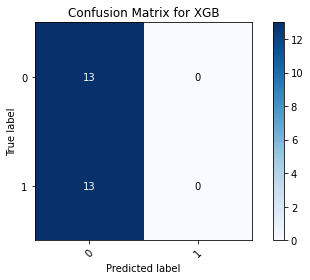

In [165]:
cm = confusion_matrix(y_test_oversampling, y_pred)

# Define class labels
classes = ['0','1']

# Plot confusion matrix
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix for XGB')
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

# Add labels to each cell
thresh = cm.max() / 2.0
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j], ha='center', va='center',
                 color='white' if cm[i, j] > thresh else 'black')

plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.tight_layout()
plt.show()

# XGB using randomized search CV

In [166]:
model = XGBClassifier()


In [167]:
param_grid = {
    'n_estimators': [100, 200, 300],  # Example values for n_estimators
    'max_depth': [3, 4, 5],           # Example values for max_depth
    'learning_rate': [0.1, 0.01, 0.001]  # Example values for learning_rate
}


In [168]:
xgb_random_search = RandomizedSearchCV(model, param_grid, n_iter=10, scoring='accuracy')


In [169]:
xgb_random_search.fit(X_train_scaled_oversampling, y_train_oversampling)  # X_train and y_train are your training data


RandomizedSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None...
                                           max_cat_threshold=None,
                                           max_cat_to_onehot=None,
                                           max_delta_step=None, max_depth=None,
                                           max_leaves=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100, n_jobs=None,
                                           num_parallel_tree=None,
                                           predictor=None, random_state=None, ...),
                   param_distributions={'learning_rate': [0.1, 0.01, 0.001],
                                        'max_depth': [3, 4, 5],
                                        'n_estimators': [100, 200, 300]},
                   scoring='accuracy')

In [170]:
best_params = xgb_random_search.best_params_
best_model = xgb_random_search.best_estimator_


In [171]:
y_pred = best_model.predict(X_test_scaled_oversampling)  # X_test is your test data


In [172]:
print(classification_report(y_test_oversampling, y_pred))

              precision    recall  f1-score   support

           0       0.57      0.62      0.59        13
           1       0.58      0.54      0.56        13

    accuracy                           0.58        26
   macro avg       0.58      0.58      0.58        26
weighted avg       0.58      0.58      0.58        26



# XGB using grid search

In [173]:
model = XGBClassifier()


In [174]:
param_grid = {
    'n_estimators': [100, 200, 300],  # Example values for n_estimators
    'max_depth': [3, 4, 5],           # Example values for max_depth
    'learning_rate': [0.1, 0.01, 0.001]  # Example values for learning_rate
}


In [175]:
xgb_grid_search = GridSearchCV(model, param_grid, scoring='accuracy')


In [176]:
xgb_grid_search.fit(X_train_scaled_oversampling, y_train_oversampling)  # X_train and y_train are your training data


GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_b...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.1, 0.01, 0.001],
                         'max_depth': [3, 4, 5],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [177]:
best_params = xgb_grid_search.best_params_
best_model = xgb_grid_search.best_estimator_


In [178]:
y_pred = best_model.predict(X_test_scaled_oversampling)  # X_test is your test data


In [179]:
print(classification_report(y_test_oversampling, y_pred))

              precision    recall  f1-score   support

           0       0.40      0.31      0.35        13
           1       0.44      0.54      0.48        13

    accuracy                           0.42        26
   macro avg       0.42      0.42      0.42        26
weighted avg       0.42      0.42      0.42        26



# XGB using Optuna

In [180]:
import optuna
import xgboost as xgb
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report


# Define the objective function for Optuna
def objective(trial):
    params = {
        'objective': 'multi:softmax',
        'num_class': 3,
        'eval_metric': 'mlogloss',
        'eta': trial.suggest_loguniform('eta', 1e-3, 0.1),
        'max_depth': trial.suggest_int('max_depth', 3, 9),
        'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.5, 1.0),
    }

    dtrain = xgb.DMatrix(X_train_scaled_oversampling, label=y_train_oversampling)
    model = xgb.train(params, dtrain)

    dtest = xgb.DMatrix(X_test_scaled_oversampling)
    y_pred = model.predict(dtest)

    y_pred = y_pred.astype(int)

    return classification_report(y_test_oversampling, y_pred, output_dict=True)['weighted avg']['f1-score']

# Create an Optuna study and optimize the objective function
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=100)

# Print the best trial and its corresponding classification report
best_trial = study.best_trial
print("Best trial:")
print("  Value: ", best_trial.value)
print("  Params: ")
for key, value in best_trial.params.items():
    print("    {}: {}".format(key, value))

# Generate predictions on the test data using the best model
best_params = best_trial.params
model = xgb.train(best_params, xgb.DMatrix(X_train_scaled_oversampling, label=y_train_oversampling))
y_pred = model.predict(xgb.DMatrix(X_test_scaled_oversampling))
y_pred = y_pred.astype(int)

# Generate the classification report
report = classification_report(y_test_oversampling, y_pred)
print("Classification Report:\n", report)



[I 2023-06-09 20:39:28,867] A new study created in memory with name: no-name-23efe81b-8fe8-482e-914a-bf03354dc922
[I 2023-06-09 20:39:28,892] Trial 0 finished with value: 0.49325337331334335 and parameters: {'eta': 0.001922629287139413, 'max_depth': 4, 'subsample': 0.5368657612608853, 'colsample_bytree': 0.6669965587625586}. Best is trial 0 with value: 0.49325337331334335.
[I 2023-06-09 20:39:28,917] Trial 1 finished with value: 0.5762962962962963 and parameters: {'eta': 0.02401136457494242, 'max_depth': 7, 'subsample': 0.6968686450169855, 'colsample_bytree': 0.7020758583180533}. Best is trial 1 with value: 0.5762962962962963.
[I 2023-06-09 20:39:28,947] Trial 2 finished with value: 0.5357142857142857 and parameters: {'eta': 0.04443128888365268, 'max_depth': 9, 'subsample': 0.6525601196979745, 'colsample_bytree': 0.9013266520479436}. Best is trial 1 with value: 0.5762962962962963.
[I 2023-06-09 20:39:28,973] Trial 3 finished with value: 0.5762962962962963 and parameters: {'eta': 0.0539

[I 2023-06-09 20:39:30,083] Trial 30 finished with value: 0.5357142857142857 and parameters: {'eta': 0.03384917969040756, 'max_depth': 4, 'subsample': 0.7400316863877245, 'colsample_bytree': 0.8349579283044738}. Best is trial 6 with value: 0.6153846153846154.
[I 2023-06-09 20:39:30,127] Trial 31 finished with value: 0.6153846153846154 and parameters: {'eta': 0.05531904455457525, 'max_depth': 3, 'subsample': 0.786452481375098, 'colsample_bytree': 0.9956440925250646}. Best is trial 6 with value: 0.6153846153846154.
[I 2023-06-09 20:39:30,172] Trial 32 finished with value: 0.5762962962962963 and parameters: {'eta': 0.0679881209808926, 'max_depth': 3, 'subsample': 0.8116836472953933, 'colsample_bytree': 0.9982894400136819}. Best is trial 6 with value: 0.6153846153846154.
[I 2023-06-09 20:39:30,216] Trial 33 finished with value: 0.6153846153846154 and parameters: {'eta': 0.047366245733423996, 'max_depth': 3, 'subsample': 0.7896598711314807, 'colsample_bytree': 0.9649002437953638}. Best is t

[I 2023-06-09 20:39:31,550] Trial 61 finished with value: 0.6153846153846154 and parameters: {'eta': 0.034392611216949684, 'max_depth': 3, 'subsample': 0.853501745300406, 'colsample_bytree': 0.953402902707462}. Best is trial 6 with value: 0.6153846153846154.
[I 2023-06-09 20:39:31,599] Trial 62 finished with value: 0.5762962962962963 and parameters: {'eta': 0.038898853662981965, 'max_depth': 3, 'subsample': 0.8107103128472011, 'colsample_bytree': 0.9977199160099938}. Best is trial 6 with value: 0.6153846153846154.
[I 2023-06-09 20:39:31,645] Trial 63 finished with value: 0.6153846153846154 and parameters: {'eta': 0.05761390619200926, 'max_depth': 3, 'subsample': 0.8408101564853696, 'colsample_bytree': 0.9771022758100076}. Best is trial 6 with value: 0.6153846153846154.
[I 2023-06-09 20:39:31,693] Trial 64 finished with value: 0.6153846153846154 and parameters: {'eta': 0.06558175276315552, 'max_depth': 4, 'subsample': 0.8604510640774878, 'colsample_bytree': 0.9473057288656734}. Best is 

[I 2023-06-09 20:39:33,049] Trial 92 finished with value: 0.5762962962962963 and parameters: {'eta': 0.04603772089143854, 'max_depth': 4, 'subsample': 0.81845719400519, 'colsample_bytree': 0.952257703756796}. Best is trial 6 with value: 0.6153846153846154.
[I 2023-06-09 20:39:33,102] Trial 93 finished with value: 0.6153846153846154 and parameters: {'eta': 0.026538908763756364, 'max_depth': 4, 'subsample': 0.7888715481538264, 'colsample_bytree': 0.9878804873292107}. Best is trial 6 with value: 0.6153846153846154.
[I 2023-06-09 20:39:33,155] Trial 94 finished with value: 0.5762962962962963 and parameters: {'eta': 0.034871636911016406, 'max_depth': 5, 'subsample': 0.75393902799346, 'colsample_bytree': 0.8695177643289302}. Best is trial 6 with value: 0.6153846153846154.
[I 2023-06-09 20:39:33,204] Trial 95 finished with value: 0.5762962962962963 and parameters: {'eta': 0.0910143510543358, 'max_depth': 3, 'subsample': 0.8417966155663347, 'colsample_bytree': 0.9312499868588074}. Best is tria

Best trial:
  Value:  0.6153846153846154
  Params: 
    eta: 0.09884273934887963
    max_depth: 3
    subsample: 0.8285676224397742
    colsample_bytree: 0.8265826453179219
Classification Report:
               precision    recall  f1-score   support

           0       0.50      1.00      0.67        13
           1       0.00      0.00      0.00        13

    accuracy                           0.50        26
   macro avg       0.25      0.50      0.33        26
weighted avg       0.25      0.50      0.33        26



# XGB using Tpot classifier

In [181]:

# Create and fit the TPOT classifier with XGB estimator
tpot = TPOTClassifier(generations=5, population_size=50, verbosity=2, template='XGBClassifier')
tpot.fit(X_train_scaled_oversampling, y_train_oversampling)

# Generate predictions on the test data
y_pred = tpot.predict(X_test_scaled_oversampling)

# Generate the classification report
report = classification_report(y_test_oversampling, y_pred)

# Print the classification report
print("Classification Report:\n", report)


Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.67

Generation 2 - Current best internal CV score: 0.6799999999999999

Generation 3 - Current best internal CV score: 0.7

Generation 4 - Current best internal CV score: 0.7

Generation 5 - Current best internal CV score: 0.7

Best pipeline: XGBClassifier(input_matrix, learning_rate=0.1, max_depth=10, min_child_weight=1, n_estimators=100, n_jobs=1, subsample=0.9500000000000001, verbosity=0)
Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.38      0.43        13
           1       0.50      0.62      0.55        13

    accuracy                           0.50        26
   macro avg       0.50      0.50      0.49        26
weighted avg       0.50      0.50      0.49        26



# XGB using bayesian optimization

In [182]:

# Define the XGB classifier
xgb_classifier = xgb.XGBClassifier()

# Define the parameter search space for Bayesian optimization
param_space = {
    'learning_rate': (0.01, 0.3, 'log-uniform'),
    'max_depth': (3, 10),
    'n_estimators': (50, 150),
    'gamma': (0.01, 1.0, 'log-uniform'),
    'min_child_weight': (1, 10),
    'subsample': (0.5, 1.0, 'uniform'),
    'colsample_bytree': (0.5, 1.0, 'uniform'),
}

# Perform Bayesian optimization with cross-validation
opt = BayesSearchCV(xgb_classifier, param_space, n_iter=20, cv=5)
opt.fit(X_train_scaled_oversampling, y_train_oversampling)

# Print the best hyperparameters found
print("Best hyperparameters: ", opt.best_params_)

# Generate predictions on the test data using the best model
y_pred = opt.predict(X_test_scaled_oversampling)

# Generate the classification report
report = classification_report(y_test_oversampling, y_pred)

# Print the classification report
print("Classification Report:\n", report)


Best hyperparameters:  OrderedDict([('colsample_bytree', 0.6519284830339642), ('gamma', 0.1507276340971294), ('learning_rate', 0.04553859070374401), ('max_depth', 4), ('min_child_weight', 3), ('n_estimators', 139), ('subsample', 0.8949839445617167)])
Classification Report:
               precision    recall  f1-score   support

           0       0.56      0.38      0.45        13
           1       0.53      0.69      0.60        13

    accuracy                           0.54        26
   macro avg       0.54      0.54      0.53        26
weighted avg       0.54      0.54      0.53        26



# GradientBoostingClassifier

In [183]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report

# Define the parameter grid with additional parameters
param_grid = {
    'learning_rate': [0.05, 0.1, 0.15],
    'max_depth': [3, 4, 5],
    'n_estimators': [100, 200, 300],
    'subsample': [0.5, 0.75, 1],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# Create a GradientBoostingClassifier object
gb = GradientBoostingClassifier()

# Use RandomizedSearchCV to find the best hyperparameters
random_gb = RandomizedSearchCV(
    estimator=gb,
    param_distributions=param_grid,
    n_iter=100,
    cv=5,
    n_jobs=-1,
    verbose=2
)

# Fit the RandomizedSearchCV object to the data
random_gb.fit(X_train_scaled_oversampling, y_train_oversampling)

# Print the best hyperparameters
print(random_gb.best_params_)

# Use the best estimator to make predictions on the test data
y_pred = random_gb.best_estimator_.predict(X_test_scaled_oversampling)

# Print the classification report
print(classification_report(y_test_oversampling, y_pred))

Fitting 5 folds for each of 100 candidates, totalling 500 fits
{'subsample': 1, 'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_depth': 5, 'learning_rate': 0.1}
              precision    recall  f1-score   support

           0       0.45      0.38      0.42        13
           1       0.47      0.54      0.50        13

    accuracy                           0.46        26
   macro avg       0.46      0.46      0.46        26
weighted avg       0.46      0.46      0.46        26



In [184]:
print('Test set score: {:.4f}'.format(random_gb.score(X_test_scaled_oversampling, y_test_oversampling)))

Test set score: 0.4615


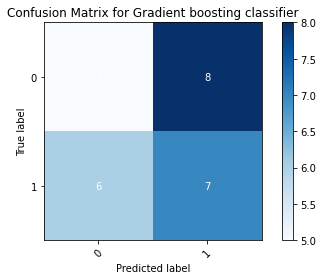

In [185]:
cm = confusion_matrix(y_test_oversampling, y_pred)

# Define class labels
classes = ['0','1']

# Plot confusion matrix
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Gradient boosting classifier')
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

# Add labels to each cell
thresh = cm.max() / 2.0
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j], ha='center', va='center',
                 color='white' if cm[i, j] > thresh else 'black')

plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.tight_layout()
plt.show()

# GradientBoostingClassifier using Grid Search 

In [186]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for grid search
param_grid = {
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [100, 500, 1000],
    'max_depth': [3, 5, 7]
}

# Create a Gradient Boosting classifier
gb_classifier = GradientBoostingClassifier()

# Perform grid search to find the best hyperparameters
grid_search = GridSearchCV(estimator=gb_classifier, param_grid=param_grid, cv=5)
grid_search.fit(X_train_scaled_oversampling, y_train_oversampling)

# Get the best hyperparameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Train the model on the entire training set
best_model.fit(X_train_scaled_oversampling, y_train_oversampling)

# Make predictions on the test set
y_pred = best_model.predict(X_test_scaled_oversampling)

# Print classification report
print("Classification Report:")
print(classification_report(y_test_oversampling, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.46      0.46      0.46        13
           1       0.46      0.46      0.46        13

    accuracy                           0.46        26
   macro avg       0.46      0.46      0.46        26
weighted avg       0.46      0.46      0.46        26



# GradientBoostingClassifier using RandomizedSearchCV

In [187]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Define the parameter grid for randomized search
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': randint(100, 500),
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 4, 6],
    'min_samples_leaf': [1, 2, 3]
}

# Create a GradientBoostingClassifier object
gb_classifier = GradientBoostingClassifier(random_state=42)

# Perform randomized search with cross-validation
random_search = RandomizedSearchCV(gb_classifier, param_distributions=param_grid, n_iter=10, cv=5, random_state=42)

# Fit the training data to the randomized search object
random_search.fit(X_train_scaled_oversampling, y_train_oversampling)

# Get the best estimator and its parameters
best_classifier = random_search.best_estimator_
best_params = random_search.best_params_

# Evaluate the best classifier on the test set
accuracy = best_classifier.score(X_test_scaled_oversampling, y_test_oversampling)


In [188]:
# Make predictions on the test set
y_pred = random_search.predict(X_test_scaled_oversampling)

# Print classification report
print("Classification Report:")
print(classification_report(y_test_oversampling, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.44      0.31      0.36        13
           1       0.47      0.62      0.53        13

    accuracy                           0.46        26
   macro avg       0.46      0.46      0.45        26
weighted avg       0.46      0.46      0.45        26



# GradientBoostingClassifier using  Optuna

In [189]:

# Define the objective function for Optuna
def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 200),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.5),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 20),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 10),
        'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
        'max_features': trial.suggest_uniform('max_features', 0.1, 1.0),
        'random_state': 42
    }

    # Create and fit the GradientBoostingClassifier with the given hyperparameters
    clf = GradientBoostingClassifier(**params)
    clf.fit(X_train_scaled_oversampling, y_train_oversampling)

    # Generate predictions on the test data
    y_pred = clf.predict(X_test_scaled_oversampling)

    # Calculate the F1-score for the weighted average class
    report = classification_report(y_test_oversampling, y_pred, output_dict=True)['weighted avg']['f1-score']

    return report

# Create an Optuna study and optimize the objective function
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

# Print the best trial and its corresponding classification report
best_trial = study.best_trial
print("Best trial:")
print("  Value: ", best_trial.value)
print("  Params: ")
for key, value in best_trial.params.items():
    print("    {}: {}".format(key, value))

# Train the final GradientBoostingClassifier using the best hyperparameters
best_params = best_trial.params
clf = GradientBoostingClassifier(**best_params)
clf.fit(X_train_scaled_oversampling, y_train_oversampling)

# Generate predictions on the test data using the best model
y_pred = clf.predict(X_test_scaled_oversampling)

# Generate the classification report
report = classification_report(y_test_oversampling, y_pred)
print("Classification Report:\n", report)


[I 2023-06-09 20:42:51,032] A new study created in memory with name: no-name-9d450537-7087-415f-8ef0-b783fdb3cf71
[I 2023-06-09 20:42:51,122] Trial 0 finished with value: 0.49325337331334335 and parameters: {'n_estimators': 104, 'learning_rate': 0.023845454658756246, 'max_depth': 5, 'min_samples_split': 12, 'min_samples_leaf': 9, 'subsample': 0.7708312493051253, 'max_features': 0.7625781063841442}. Best is trial 0 with value: 0.49325337331334335.
[I 2023-06-09 20:42:51,197] Trial 1 finished with value: 0.6153846153846154 and parameters: {'n_estimators': 73, 'learning_rate': 0.17017369799434146, 'max_depth': 6, 'min_samples_split': 12, 'min_samples_leaf': 2, 'subsample': 0.7510815235644728, 'max_features': 0.15311768997410302}. Best is trial 1 with value: 0.6153846153846154.
[I 2023-06-09 20:42:51,279] Trial 2 finished with value: 0.49925925925925935 and parameters: {'n_estimators': 64, 'learning_rate': 0.0900493993890985, 'max_depth': 9, 'min_samples_split': 14, 'min_samples_leaf': 7, 

[I 2023-06-09 20:42:54,102] Trial 24 finished with value: 0.5357142857142857 and parameters: {'n_estimators': 132, 'learning_rate': 0.35652090662583313, 'max_depth': 4, 'min_samples_split': 2, 'min_samples_leaf': 2, 'subsample': 0.7019252678143693, 'max_features': 0.4326055476155659}. Best is trial 1 with value: 0.6153846153846154.
[I 2023-06-09 20:42:54,274] Trial 25 finished with value: 0.4583333333333333 and parameters: {'n_estimators': 112, 'learning_rate': 0.20440310316966204, 'max_depth': 8, 'min_samples_split': 14, 'min_samples_leaf': 3, 'subsample': 0.7508068880414668, 'max_features': 0.18384713189094973}. Best is trial 1 with value: 0.6153846153846154.
[I 2023-06-09 20:42:54,389] Trial 26 finished with value: 0.49325337331334335 and parameters: {'n_estimators': 93, 'learning_rate': 0.1428987133830496, 'max_depth': 7, 'min_samples_split': 5, 'min_samples_leaf': 5, 'subsample': 0.561805956919931, 'max_features': 0.2947357757907028}. Best is trial 1 with value: 0.6153846153846154

[I 2023-06-09 20:42:57,260] Trial 48 finished with value: 0.5762962962962963 and parameters: {'n_estimators': 106, 'learning_rate': 0.25495930985275544, 'max_depth': 6, 'min_samples_split': 17, 'min_samples_leaf': 2, 'subsample': 0.6630573005141316, 'max_features': 0.2969071600680673}. Best is trial 27 with value: 0.6533333333333332.
[I 2023-06-09 20:42:57,350] Trial 49 finished with value: 0.49925925925925935 and parameters: {'n_estimators': 56, 'learning_rate': 0.31271861825181224, 'max_depth': 5, 'min_samples_split': 12, 'min_samples_leaf': 7, 'subsample': 0.7222064889223814, 'max_features': 0.40139833604315767}. Best is trial 27 with value: 0.6533333333333332.
[I 2023-06-09 20:42:57,532] Trial 50 finished with value: 0.6153846153846154 and parameters: {'n_estimators': 193, 'learning_rate': 0.15265723831393385, 'max_depth': 7, 'min_samples_split': 19, 'min_samples_leaf': 1, 'subsample': 0.6128485732678383, 'max_features': 0.13359664198829013}. Best is trial 27 with value: 0.65333333

[I 2023-06-09 20:43:00,463] Trial 72 finished with value: 0.49325337331334335 and parameters: {'n_estimators': 63, 'learning_rate': 0.2244038585865648, 'max_depth': 5, 'min_samples_split': 13, 'min_samples_leaf': 6, 'subsample': 0.6466738651000875, 'max_features': 0.1433156257152415}. Best is trial 27 with value: 0.6533333333333332.
[I 2023-06-09 20:43:00,575] Trial 73 finished with value: 0.5357142857142857 and parameters: {'n_estimators': 90, 'learning_rate': 0.36494048613461155, 'max_depth': 4, 'min_samples_split': 12, 'min_samples_leaf': 8, 'subsample': 0.6725267506461734, 'max_features': 0.125707333397249}. Best is trial 27 with value: 0.6533333333333332.
[I 2023-06-09 20:43:00,695] Trial 74 finished with value: 0.5762962962962963 and parameters: {'n_estimators': 84, 'learning_rate': 0.2885873727826756, 'max_depth': 6, 'min_samples_split': 11, 'min_samples_leaf': 5, 'subsample': 0.5904641461913263, 'max_features': 0.18523282590830184}. Best is trial 27 with value: 0.65333333333333

[I 2023-06-09 20:43:04,518] Trial 96 finished with value: 0.5384615384615384 and parameters: {'n_estimators': 73, 'learning_rate': 0.1806474496376763, 'max_depth': 4, 'min_samples_split': 18, 'min_samples_leaf': 3, 'subsample': 0.6615184298212308, 'max_features': 0.2772131317003622}. Best is trial 27 with value: 0.6533333333333332.
[I 2023-06-09 20:43:04,698] Trial 97 finished with value: 0.5384615384615384 and parameters: {'n_estimators': 151, 'learning_rate': 0.31094861494021087, 'max_depth': 9, 'min_samples_split': 16, 'min_samples_leaf': 8, 'subsample': 0.6388322366716842, 'max_features': 0.3021849159935151}. Best is trial 27 with value: 0.6533333333333332.
[I 2023-06-09 20:43:04,855] Trial 98 finished with value: 0.5272727272727272 and parameters: {'n_estimators': 137, 'learning_rate': 0.39315743936577224, 'max_depth': 8, 'min_samples_split': 19, 'min_samples_leaf': 2, 'subsample': 0.6789001599024259, 'max_features': 0.3377851161538503}. Best is trial 27 with value: 0.653333333333

Best trial:
  Value:  0.6533333333333332
  Params: 
    n_estimators: 71
    learning_rate: 0.3352701556109039
    max_depth: 6
    min_samples_split: 12
    min_samples_leaf: 4
    subsample: 0.6741109991759524
    max_features: 0.18444662772838222
Classification Report:
               precision    recall  f1-score   support

           0       0.60      0.46      0.52        13
           1       0.56      0.69      0.62        13

    accuracy                           0.58        26
   macro avg       0.58      0.58      0.57        26
weighted avg       0.58      0.58      0.57        26



# GradientBoostingClassifier using Tpot classifier

In [190]:

# Create and fit the TPOT classifier with the GradientBoostingClassifier estimator
tpot = TPOTClassifier(generations=5, population_size=50, verbosity=2, template='GradientBoostingClassifier')
tpot.fit(X_train_scaled_oversampling, y_train_oversampling)

# Generate predictions on the test data using the best model found by TPOT
y_pred = tpot.predict(X_test_scaled_oversampling)

# Generate the classification report
report = classification_report(y_test_oversampling, y_pred)

# Print the classification report
print("Classification Report:\n", report)


Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Best pipeline: GradientBoostingClassifier(input_matrix, learning_rate=0.1, max_depth=8, max_features=0.7500000000000001, min_samples_leaf=5, min_samples_split=8, n_estimators=100, subsample=0.9000000000000001)
Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.38      0.43        13
           1       0.50      0.62      0.55        13

    accuracy                           0.50        26
   macro avg       0.50      0.50      0.49        26
weighted avg       0.50      0.50      0.49        26



# GradientBoostingClassifier using bayesian optimization

In [191]:

# Define the search space for hyperparameters
param_space = {
    'n_estimators': (50, 200),
    'learning_rate': (0.01, 0.5, 'log-uniform'),
    'max_depth': (3, 10),
    'min_samples_split': (2, 20),
    'min_samples_leaf': (1, 10),
    'subsample': (0.5, 1.0),
    'max_features': (0.1, 1.0)
}

# Create and fit the GradientBoostingClassifier with Bayesian optimization
opt_model = BayesSearchCV(
    GradientBoostingClassifier(),
    param_space,
    n_iter=50,
    scoring='f1_weighted',
    n_jobs=-1,
    cv=5
)
opt_model.fit(X_train_scaled_oversampling, y_train_oversampling)

# Generate predictions on the test data using the best model found by Bayesian optimization
y_pred = opt_model.predict(X_test_scaled_oversampling)

# Generate the classification report
report = classification_report(y_test_oversampling, y_pred)

# Print the classification report
print("Classification Report:\n", report)


Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.31      0.38        13
           1       0.50      0.69      0.58        13

    accuracy                           0.50        26
   macro avg       0.50      0.50      0.48        26
weighted avg       0.50      0.50      0.48        26



# Decision tree classifier


In [192]:
from sklearn.tree import DecisionTreeClassifier


In [193]:
# Create a decision tree classifier
dt_classifier = DecisionTreeClassifier()

# Fit the classifier to the training data
dt_classifier.fit(X_train_scaled_oversampling, y_train_oversampling)

# Make predictions on the testing data
y_pred = dt_classifier.predict(X_test_scaled_oversampling)

# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test_oversampling, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.4230769230769231


In [194]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(dt_classifier.score(X_train_scaled_oversampling, y_train_oversampling)))

print('Test set score: {:.4f}'.format(dt_classifier.score(X_test_scaled_oversampling, y_test_oversampling)))


Training set score: 1.0000
Test set score: 0.4231


In [195]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test_oversampling, y_pred)

print('Confusion matrix\n\n', cm)


Confusion matrix

 [[6 7]
 [8 5]]


In [196]:
# Print the classification report
print(classification_report(y_test_oversampling, y_pred))

              precision    recall  f1-score   support

           0       0.43      0.46      0.44        13
           1       0.42      0.38      0.40        13

    accuracy                           0.42        26
   macro avg       0.42      0.42      0.42        26
weighted avg       0.42      0.42      0.42        26



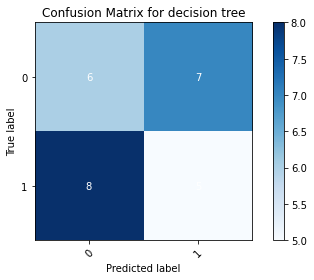

In [197]:
cm = confusion_matrix(y_test_oversampling, y_pred)

# Define class labels
classes = ['0','1']

# Plot confusion matrix
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix for decision tree')
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

# Add labels to each cell
thresh = cm.max() / 2.0
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j], ha='center', va='center',
                 color='white' if cm[i, j] > thresh else 'black')

plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.tight_layout()
plt.show()

# Decision tree using randomized search

In [198]:
dt = DecisionTreeClassifier()


In [199]:
param_dist = {
    'criterion': ['gini', 'entropy'],  # Example values for criterion
    'max_depth': [None, 5, 10, 15],  # Example values for max_depth
    'min_samples_split': [2, 5, 10],  # Example values for min_samples_split
    'min_samples_leaf': [1, 2, 4],  # Example values for min_samples_leaf
    'max_features': ['auto', 'sqrt']  # Example values for max_features
}


In [200]:
dt_random_search = RandomizedSearchCV(dt, param_distributions=param_dist, n_iter=10, scoring='accuracy')


In [201]:
dt_random_search.fit(X_train_scaled_oversampling,y_train_oversampling)  # X_train and y_train are your training data


RandomizedSearchCV(estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [None, 5, 10, 15],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10]},
                   scoring='accuracy')

In [202]:
best_params = dt_random_search.best_params_
best_model = dt_random_search.best_estimator_


In [203]:
y_pred = best_model.predict(X_test_scaled_oversampling)  # X_test is your test data


In [204]:
print(classification_report(y_test_oversampling, y_pred))

              precision    recall  f1-score   support

           0       0.44      0.62      0.52        13
           1       0.38      0.23      0.29        13

    accuracy                           0.42        26
   macro avg       0.41      0.42      0.40        26
weighted avg       0.41      0.42      0.40        26



# Decision tree using Grid search

In [205]:
dt = DecisionTreeClassifier()


In [206]:
param_grid = {
    'criterion': ['gini', 'entropy'],  # Example values for criterion
    'max_depth': [None, 5, 10, 15],  # Example values for max_depth
    'min_samples_split': [2, 5, 10],  # Example values for min_samples_split
    'min_samples_leaf': [1, 2, 4],  # Example values for min_samples_leaf
    'max_features': ['auto', 'sqrt']  # Example values for max_features
}


In [207]:
dt_grid_search = GridSearchCV(dt, param_grid, scoring='accuracy')


In [208]:
dt_grid_search.fit(X_train_scaled_oversampling,y_train_oversampling)  # X_train and y_train are your training data


GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10, 15],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [209]:
best_params = dt_grid_search.best_params_
best_model =dt_grid_search.best_estimator_


In [210]:
y_pred = best_model.predict(X_test_scaled_oversampling)  # X_test is your test data

In [211]:
print(classification_report(y_test_oversampling, y_pred))

              precision    recall  f1-score   support

           0       0.45      0.38      0.42        13
           1       0.47      0.54      0.50        13

    accuracy                           0.46        26
   macro avg       0.46      0.46      0.46        26
weighted avg       0.46      0.46      0.46        26



# Decision tree using Optuna

In [212]:
from optuna import Trial, create_study, study

# Create the decision tree classifier
clf = DecisionTreeClassifier()

# Create the Optuna study
study = create_study()

# Define the objective function
def objective(trial):
  # Set the hyperparameters
  max_depth = trial.suggest_int("max_depth", 1, 10)
  min_samples_split = trial.suggest_int("min_samples_split", 2, 10)

  # Fit the classifier
  clf.set_params(max_depth=max_depth, min_samples_split=min_samples_split)
  clf.fit(X_train_scaled_oversampling, y_train_oversampling)

  # Evaluate the classifier
  y_pred = clf.predict(X_test_scaled_oversampling)
  accuracy = accuracy_score(y_test_oversampling, y_pred)

  # Return the accuracy
  return accuracy

# Run the optimization
study.optimize(objective, n_trials=100)

# Get the best parameters
best_params = study.best_params

# Fit the classifier with the best parameters
clf.set_params(**best_params)
clf.fit(X_train_scaled_oversampling, y_train_oversampling)

# Predict the test set labels
y_pred = clf.predict(X_test_scaled_oversampling)

# Print the classification report
print(classification_report(y_test_oversampling, y_pred))


[I 2023-06-09 20:45:16,649] A new study created in memory with name: no-name-78622fff-8dbd-4741-a33a-40b7ab8bfe8a
[I 2023-06-09 20:45:16,656] Trial 0 finished with value: 0.6923076923076923 and parameters: {'max_depth': 6, 'min_samples_split': 5}. Best is trial 0 with value: 0.6923076923076923.
[I 2023-06-09 20:45:16,663] Trial 1 finished with value: 0.6538461538461539 and parameters: {'max_depth': 2, 'min_samples_split': 3}. Best is trial 1 with value: 0.6538461538461539.
[I 2023-06-09 20:45:16,669] Trial 2 finished with value: 0.5384615384615384 and parameters: {'max_depth': 4, 'min_samples_split': 6}. Best is trial 2 with value: 0.5384615384615384.
[I 2023-06-09 20:45:16,674] Trial 3 finished with value: 0.6153846153846154 and parameters: {'max_depth': 1, 'min_samples_split': 5}. Best is trial 2 with value: 0.5384615384615384.
[I 2023-06-09 20:45:16,681] Trial 4 finished with value: 0.6153846153846154 and parameters: {'max_depth': 4, 'min_samples_split': 4}. Best is trial 2 with val

[I 2023-06-09 20:45:17,261] Trial 42 finished with value: 0.5769230769230769 and parameters: {'max_depth': 8, 'min_samples_split': 3}. Best is trial 8 with value: 0.3076923076923077.
[I 2023-06-09 20:45:17,278] Trial 43 finished with value: 0.5 and parameters: {'max_depth': 7, 'min_samples_split': 2}. Best is trial 8 with value: 0.3076923076923077.
[I 2023-06-09 20:45:17,295] Trial 44 finished with value: 0.5384615384615384 and parameters: {'max_depth': 9, 'min_samples_split': 3}. Best is trial 8 with value: 0.3076923076923077.
[I 2023-06-09 20:45:17,312] Trial 45 finished with value: 0.5 and parameters: {'max_depth': 10, 'min_samples_split': 2}. Best is trial 8 with value: 0.3076923076923077.
[I 2023-06-09 20:45:17,330] Trial 46 finished with value: 0.5769230769230769 and parameters: {'max_depth': 8, 'min_samples_split': 4}. Best is trial 8 with value: 0.3076923076923077.
[I 2023-06-09 20:45:17,347] Trial 47 finished with value: 0.5 and parameters: {'max_depth': 7, 'min_samples_split'

[I 2023-06-09 20:45:18,024] Trial 85 finished with value: 0.5384615384615384 and parameters: {'max_depth': 8, 'min_samples_split': 3}. Best is trial 8 with value: 0.3076923076923077.
[I 2023-06-09 20:45:18,043] Trial 86 finished with value: 0.5384615384615384 and parameters: {'max_depth': 9, 'min_samples_split': 4}. Best is trial 8 with value: 0.3076923076923077.
[I 2023-06-09 20:45:18,060] Trial 87 finished with value: 0.6153846153846154 and parameters: {'max_depth': 6, 'min_samples_split': 2}. Best is trial 8 with value: 0.3076923076923077.
[I 2023-06-09 20:45:18,079] Trial 88 finished with value: 0.5384615384615384 and parameters: {'max_depth': 8, 'min_samples_split': 3}. Best is trial 8 with value: 0.3076923076923077.
[I 2023-06-09 20:45:18,095] Trial 89 finished with value: 0.46153846153846156 and parameters: {'max_depth': 7, 'min_samples_split': 2}. Best is trial 8 with value: 0.3076923076923077.
[I 2023-06-09 20:45:18,113] Trial 90 finished with value: 0.5384615384615384 and par

              precision    recall  f1-score   support

           0       0.45      0.38      0.42        13
           1       0.47      0.54      0.50        13

    accuracy                           0.46        26
   macro avg       0.46      0.46      0.46        26
weighted avg       0.46      0.46      0.46        26



# Decision tree using Tpot classifier

In [213]:
# Create a TPOT classifier and specify the generations and population size
tpot = TPOTClassifier(generations=10, population_size=50, verbosity=2, 
                      config_dict={'sklearn.tree.DecisionTreeClassifier': {}})

# Fit the classifier to the training data
tpot.fit(X_train_scaled_oversampling, y_train_oversampling)

# Evaluate the classifier on the validation data
y_pred = tpot.predict(X_test_scaled_oversampling)

# Generate a classification report
report = classification_report(y_test_oversampling, y_pred)

# Print the classification report
print("Classification Report:")
print(report)

Optimization Progress:   0%|          | 0/550 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.5900000000000001

Generation 2 - Current best internal CV score: 0.5900000000000001

Generation 3 - Current best internal CV score: 0.5900000000000001

Generation 4 - Current best internal CV score: 0.5900000000000001

Generation 5 - Current best internal CV score: 0.5900000000000001

Generation 6 - Current best internal CV score: 0.61

Generation 7 - Current best internal CV score: 0.61

Generation 8 - Current best internal CV score: 0.61

Generation 9 - Current best internal CV score: 0.61

Generation 10 - Current best internal CV score: 0.61

Best pipeline: DecisionTreeClassifier(CombineDFs(CombineDFs(CombineDFs(input_matrix, input_matrix), input_matrix), input_matrix))
Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.62      0.62        13
           1       0.62      0.62      0.62        13

    accuracy                           0.62        26
   macro avg       0.62    

# Decision tree using bayesian optimization

In [214]:
# Define the search space for hyperparameters
param_space = {
    'criterion': ['gini', 'entropy'],
    'max_depth': (3, 10),
    'min_samples_split': (2, 20),
    'min_samples_leaf': (1, 10),
    'max_features': (0.1, 1.0)
}
opt_model = BayesSearchCV(
    DecisionTreeClassifier(),
    param_space,
    n_iter=50,
    scoring='f1_weighted',
    n_jobs=-1,
    cv=5
)
opt_model.fit(X_train_scaled_oversampling, y_train_oversampling)

# Generate predictions on the test data using the best model found by Bayesian optimization
y_pred = opt_model.predict(X_test_scaled_oversampling)

# Generate the classification report
report = classification_report(y_test_oversampling, y_pred)

# Print the classification report
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       0.53      0.62      0.57        13
           1       0.55      0.46      0.50        13

    accuracy                           0.54        26
   macro avg       0.54      0.54      0.54        26
weighted avg       0.54      0.54      0.54        26



# NAIVE BAYES(Gaussian)

In [215]:
# train a Gaussian Naive Bayes classifier on the training set
from sklearn.naive_bayes import GaussianNB


# instantiate the model
gnb = GaussianNB()


# fit the model
gnb.fit(X_train_scaled_oversampling, y_train_oversampling)

GaussianNB()

In [216]:
y_pred = gnb.predict(X_test_scaled_oversampling)


In [217]:
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test_oversampling, y_pred)))

Model accuracy score: 0.5000


In [218]:
y_pred_train = gnb.predict(X_train_scaled_oversampling)


In [219]:
# Print the classification report
print(classification_report(y_test_oversampling, y_pred))

              precision    recall  f1-score   support

           0       0.50      0.38      0.43        13
           1       0.50      0.62      0.55        13

    accuracy                           0.50        26
   macro avg       0.50      0.50      0.49        26
weighted avg       0.50      0.50      0.49        26



# NAIVE BAYES(Gaussian) using randomized search

In [220]:

# Define the parameter grid for randomized search
param_grid = {
    'var_smoothing': np.logspace(-10, 0, num=100)
}

# Create and fit the Gaussian Naive Bayes classifier with randomized search
randomized_search = RandomizedSearchCV(
    GaussianNB(),
    param_grid,
    n_iter=50,
    scoring='f1_weighted',
    cv=5,
    random_state=42
)
randomized_search.fit(X_train_scaled_oversampling, y_train_oversampling)

# Generate predictions on the test data using the best model found by randomized search
y_pred = randomized_search.predict(X_test_scaled_oversampling)

# Generate the classification report
report = classification_report(y_test_oversampling, y_pred)

# Print the classification report
print("Classification Report:\n", report)


Classification Report:
               precision    recall  f1-score   support

           0       0.45      0.38      0.42        13
           1       0.47      0.54      0.50        13

    accuracy                           0.46        26
   macro avg       0.46      0.46      0.46        26
weighted avg       0.46      0.46      0.46        26



# NAIVE BAYES(Gaussian) using Grid search

In [221]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Define the parameter grid
param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5],
    'priors': [None, [0.2, 0.3, 0.5], [0.1, 0.4, 0.5]]
    # Add more parameters and their values here
}

# Create the Gaussian Naive Bayes classifier
gnb = GaussianNB()

# Perform grid search for hyperparameter tuning
grid_search = GridSearchCV(gnb, param_grid=param_grid, cv=5)
grid_search.fit(X_train_scaled_oversampling, y_train_oversampling)

# Print the best parameters and best score
print("Best Parameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)

# Make predictions on the test set using the best model
y_pred = grid_search.predict(X_test_scaled_oversampling)

# Generate the classification report
report = classification_report(y_test_oversampling, y_pred)
print("Classification Report:")
print(report)


Best Parameters:  {'priors': None, 'var_smoothing': 1e-09}
Best Score:  0.5900000000000001
Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.38      0.43        13
           1       0.50      0.62      0.55        13

    accuracy                           0.50        26
   macro avg       0.50      0.50      0.49        26
weighted avg       0.50      0.50      0.49        26



# NAIVE BAYES(Gaussian) using Optuna

# NAIVE BAYES(Gaussian) using Tpot classifier

In [222]:
#!pip install tpot --upgrade

In [223]:
from tpot import TPOTClassifier
from sklearn.metrics import classification_report

# Define the custom configuration
custom_config = {
    'sklearn.naive_bayes.GaussianNB': {
        'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3]
    }
}

# Create the TPOT classifier with the custom configuration
tpot = TPOTClassifier(config_dict=custom_config, generations=5, population_size=50, verbosity=2, random_state=42)

# Fit the classifier to the training data
tpot.fit(X_train_scaled_oversampling, y_train_oversampling)

# Predict the test set labels
y_pred = tpot.predict(X_test_scaled_oversampling)

# Print the classification report
report = classification_report(y_test_oversampling, y_pred)
print(report)



Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.5900000000000001

Generation 2 - Current best internal CV score: 0.5900000000000001

Generation 3 - Current best internal CV score: 0.5900000000000001

Generation 4 - Current best internal CV score: 0.5900000000000001

Generation 5 - Current best internal CV score: 0.5900000000000001

Best pipeline: GaussianNB(input_matrix, var_smoothing=1e-06)
              precision    recall  f1-score   support

           0       0.50      0.38      0.43        13
           1       0.50      0.62      0.55        13

    accuracy                           0.50        26
   macro avg       0.50      0.50      0.49        26
weighted avg       0.50      0.50      0.49        26



# NAIVE BAYES(Gaussian) using bayesian optimization

In [224]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from skopt import BayesSearchCV

# Define the Gaussian Naive Bayes classifier
gnb = GaussianNB()

# Define the parameter search space
param_space = {
    'var_smoothing': (1e-9, 1e-3, 'log-uniform')
}

# Perform Bayesian optimization
opt = BayesSearchCV(gnb, param_space, n_iter=20, cv=5, n_jobs=-1)
opt.fit(X_train_scaled_oversampling, y_train_oversampling)

# Print the best parameters and best score
print("Best Parameters:", opt.best_params_)
print("Best Score:", opt.best_score_)

# Fit the classifier with the best parameters
best_gnb = GaussianNB(var_smoothing=opt.best_params_['var_smoothing'])
best_gnb.fit(X_train_scaled_oversampling, y_train_oversampling)

# Predict the test set labels
y_pred = best_gnb.predict(X_test_scaled_oversampling)

# Print the classification report
report = classification_report(y_test_oversampling, y_pred)
print(report)


Best Parameters: OrderedDict([('var_smoothing', 9.743043741056927e-06)])
Best Score: 0.5900000000000001
              precision    recall  f1-score   support

           0       0.50      0.38      0.43        13
           1       0.50      0.62      0.55        13

    accuracy                           0.50        26
   macro avg       0.50      0.50      0.49        26
weighted avg       0.50      0.50      0.49        26



# NAIVE BAYES(BernoulliNB)

In [225]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score

BernNB = BernoulliNB(binarize=0.0, fit_prior=True, class_prior=None)
BernNB.fit(X_train_scaled_oversampling, y_train_oversampling)
print(BernNB)


y_pred = BernNB.predict(X_test_scaled_oversampling)


print(classification_report(y_test_oversampling, y_pred))


BernoulliNB()
              precision    recall  f1-score   support

           0       0.45      0.38      0.42        13
           1       0.47      0.54      0.50        13

    accuracy                           0.46        26
   macro avg       0.46      0.46      0.46        26
weighted avg       0.46      0.46      0.46        26



# NAIVE BAYES(BernoulliNB) using randomized search

In [226]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report

# Create the BernoulliNB classifier
classifier = BernoulliNB()

# Define the hyperparameter grid
param_grid = {
    'alpha': [0.001, 0.01, 0.1, 1.0],
    'fit_prior': [True, False]
}

# Create the randomized search object
random_search = RandomizedSearchCV(classifier, param_distributions=param_grid, n_iter=10, cv=5, scoring='accuracy', random_state=42)

# Fit the classifier to the training data
random_search.fit(X_train_scaled_oversampling, y_train_oversampling)

# Predict the test set labels
y_pred = random_search.predict(X_test_scaled_oversampling)

# Print the classification report
print(classification_report(y_test_oversampling, y_pred))


              precision    recall  f1-score   support

           0       0.45      0.38      0.42        13
           1       0.47      0.54      0.50        13

    accuracy                           0.46        26
   macro avg       0.46      0.46      0.46        26
weighted avg       0.46      0.46      0.46        26



# NAIVE BAYES(BernoulliNB) using Grid Search

In [227]:
nbbernouli = BernoulliNB()

In [228]:
parameters = {
    'alpha': (1, 0.1, 0.01, 0.001, 0.0001, 0.00001)
}
nb_grid_search = GridSearchCV(nbbernouli, parameters)
nb_grid_search.fit(X_train_scaled_oversampling, y_train_oversampling)
nb_grid_search.best_params_


{'alpha': 1}

In [229]:
print(classification_report(y_test_oversampling, pred))

              precision    recall  f1-score   support

           0       0.69      0.69      0.69        13
           1       0.69      0.69      0.69        13

    accuracy                           0.69        26
   macro avg       0.69      0.69      0.69        26
weighted avg       0.69      0.69      0.69        26



# NAIVE BAYES(BernoulliNB) using Optuna

# NAIVE BAYES(BernoulliNB) using Tpot classifier

In [230]:
from sklearn.naive_bayes import BernoulliNB
from tpot import TPOTClassifier
from sklearn.metrics import classification_report

# Create the TPOT classifier
tpot = TPOTClassifier(generations=5, population_size=50, verbosity=2, random_state=42, 
                      config_dict={'sklearn.naive_bayes.BernoulliNB': {}})

# Fit the classifier to the training data
tpot.fit(X_train_scaled_oversampling, y_train_oversampling)

# Predict the test set labels
y_pred = tpot.predict(X_test_scaled_oversampling)

# Print the classification report
print(classification_report(y_test_oversampling, y_pred))


Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Best pipeline: BernoulliNB(input_matrix)
              precision    recall  f1-score   support

           0       0.45      0.38      0.42        13
           1       0.47      0.54      0.50        13

    accuracy                           0.46        26
   macro avg       0.46      0.46      0.46        26
weighted avg       0.46      0.46      0.46        26



# NAIVE BAYES(BernoulliNB) using bayesian optimization

In [231]:
from sklearn.naive_bayes import BernoulliNB
from skopt import BayesSearchCV
from sklearn.metrics import classification_report

# Create the BernoulliNB classifier
classifier = BernoulliNB()

# Define the search space for hyperparameters
param_space = {
    'alpha': (1e-3, 1e-1, 'log-uniform'),
    'fit_prior': [True, False]
}

# Create the Bayesian optimization object
opt = BayesSearchCV(classifier, param_space, n_iter=50, cv=5, scoring='accuracy')

# Fit the classifier to the training data
opt.fit(X_train_scaled_oversampling, y_train_oversampling)

# Predict the test set labels
y_pred = opt.predict(X_test_scaled_oversampling)

# Print the classification report
print(classification_report(y_test_oversampling, y_pred))


              precision    recall  f1-score   support

           0       0.50      0.46      0.48        13
           1       0.50      0.54      0.52        13

    accuracy                           0.50        26
   macro avg       0.50      0.50      0.50        26
weighted avg       0.50      0.50      0.50        26



# NAIVE BAYES(Multinomial)

In [232]:
MultiNB = MultinomialNB(fit_prior=True, class_prior=None)
MultiNB.fit(X_train_scaled_oversampling, y_train_oversampling)
print(MultiNB)


y_pred = MultiNB.predict(X_test_scaled_oversampling)


print(classification_report(y_test_oversampling, y_pred))

MultinomialNB()
              precision    recall  f1-score   support

           0       0.55      0.46      0.50        13
           1       0.53      0.62      0.57        13

    accuracy                           0.54        26
   macro avg       0.54      0.54      0.54        26
weighted avg       0.54      0.54      0.54        26



# NAIVE BAYES(Multinomial) using randomized search

In [233]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report

# Create the MultinomialNB classifier
classifier = MultinomialNB()

# Define the hyperparameter grid
param_grid = {
    'alpha': [0.001, 0.01, 0.1, 1.0],
    'fit_prior': [True, False]
}

# Create the randomized search object
random_search = RandomizedSearchCV(classifier, param_distributions=param_grid, n_iter=10, cv=5, scoring='accuracy', random_state=42)

# Fit the classifier to the training data
random_search.fit(X_train_scaled_oversampling, y_train_oversampling)

# Predict the test set labels
y_pred = random_search.predict(X_test_scaled_oversampling)

# Print the classification report
print(classification_report(y_test_oversampling, y_pred))


              precision    recall  f1-score   support

           0       0.55      0.46      0.50        13
           1       0.53      0.62      0.57        13

    accuracy                           0.54        26
   macro avg       0.54      0.54      0.54        26
weighted avg       0.54      0.54      0.54        26



# NAIVE BAYES(Multinomial) using Grid Search

In [234]:
nb = MultinomialNB()
parameters = {
    'alpha': (1, 0.1, 0.01, 0.001, 0.0001, 0.00001)
}
grid_search = GridSearchCV(nb, parameters)
grid_search.fit(X_train_scaled_oversampling, y_train_oversampling)
grid_search.best_params_
nbmu_grid_search = MultinomialNB(alpha=1)
nbmu_grid_search.fit(X_train_scaled_oversampling, y_train_oversampling)
pred = nbmu_grid_search.predict(X_test_scaled_oversampling)

print(classification_report(y_test_oversampling, pred))

              precision    recall  f1-score   support

           0       0.55      0.46      0.50        13
           1       0.53      0.62      0.57        13

    accuracy                           0.54        26
   macro avg       0.54      0.54      0.54        26
weighted avg       0.54      0.54      0.54        26



# NAIVE BAYES(Multinomial) using Optuna

# NAIVE BAYES(Multinomial) using Tpot classifier

In [235]:
from sklearn.naive_bayes import MultinomialNB
from skopt import BayesSearchCV
from sklearn.metrics import classification_report

# Create the MultinomialNB classifier
classifier = MultinomialNB()

# Define the search space for hyperparameters
param_space = {
    'alpha': (0.001, 1.0, 'log-uniform'),
    'fit_prior': [True, False]
}

# Create the BayesSearchCV object
bayes_search = BayesSearchCV(classifier, param_space, n_iter=50, cv=5, scoring='accuracy', random_state=42)

# Fit the classifier to the training data
bayes_search.fit(X_train_scaled_oversampling, y_train_oversampling)

# Predict the test set labels
y_pred = bayes_search.predict(X_test_scaled_oversampling)

# Print the classification report
print(classification_report(y_test_oversampling, y_pred))


              precision    recall  f1-score   support

           0       0.55      0.46      0.50        13
           1       0.53      0.62      0.57        13

    accuracy                           0.54        26
   macro avg       0.54      0.54      0.54        26
weighted avg       0.54      0.54      0.54        26



# NAIVE BAYES(BernoulliNB) using bayesian optimization

In [236]:
from sklearn.naive_bayes import BernoulliNB
from skopt import BayesSearchCV
from sklearn.metrics import classification_report

# Create the BernoulliNB classifier
classifier = BernoulliNB()

# Define the search space for hyperparameters
param_space = {
    'alpha': (0.001, 1.0, 'log-uniform'),
    'binarize': (0.0, 1.0, 'uniform'),
    'fit_prior': [True, False]
}

# Create the BayesSearchCV object
bayes_search = BayesSearchCV(classifier, param_space, n_iter=50, cv=5, scoring='accuracy', random_state=42)

# Fit the classifier to the training data
bayes_search.fit(X_train_scaled_oversampling, y_train_oversampling)

# Predict the test set labels
y_pred = bayes_search.predict(X_test_scaled_oversampling)

# Print the classification report
print(classification_report(y_test_oversampling, y_pred))


              precision    recall  f1-score   support

           0       0.50      0.38      0.43        13
           1       0.50      0.62      0.55        13

    accuracy                           0.50        26
   macro avg       0.50      0.50      0.49        26
weighted avg       0.50      0.50      0.49        26



# SVM with default hyperparameters

In [237]:
# import SVC classifier
from sklearn.svm import SVC


# import metrics to compute accuracy
from sklearn.metrics import accuracy_score


# instantiate classifier with default hyperparameters
svc=SVC() 


# fit classifier to training set
svc.fit(X_train_scaled_oversampling,y_train_oversampling)


# make predictions on test set
y_pred=svc.predict(X_test_scaled_oversampling)


# compute and print accuracy score
print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(accuracy_score(y_test_oversampling, y_pred)))

Model accuracy score with default hyperparameters: 0.5385


In [238]:
# instantiate classifier with rbf kernel and C=100
svc100=SVC(C=100.0) 


# fit classifier to training set
svc100.fit(X_train_scaled_oversampling,y_train_oversampling)


# make predictions on test set
y_pred=svc100.predict(X_test_scaled_oversampling)


# compute and print accuracy score
print('Model accuracy score with rbf kernel and C=100.0 : {0:0.4f}'. format(accuracy_score(y_test_oversampling, y_pred)))

Model accuracy score with rbf kernel and C=100.0 : 0.5385


In [239]:
# Print the classification report
print(classification_report(y_test_oversampling, y_pred))

              precision    recall  f1-score   support

           0       0.55      0.46      0.50        13
           1       0.53      0.62      0.57        13

    accuracy                           0.54        26
   macro avg       0.54      0.54      0.54        26
weighted avg       0.54      0.54      0.54        26



# SVM with rbf kernel and C=1000.0

In [240]:
# instantiate classifier with rbf kernel and C=1000
svc1000=SVC(C=1000.0) 


# fit classifier to training set
svc1000.fit(X_train_scaled_oversampling,y_train_oversampling)


# make predictions on test set
y_pred=svc1000.predict(X_test_scaled_oversampling)


# compute and print accuracy score
print('Model accuracy score with rbf kernel and C=1000.0 : {0:0.4f}'. format(accuracy_score(y_test_oversampling, y_pred)))

Model accuracy score with rbf kernel and C=1000.0 : 0.5385


In [241]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(svc.score(X_train_scaled_oversampling, y_train_oversampling)))

print('Test set score: {:.4f}'.format(svc.score(X_test_scaled_oversampling, y_test_oversampling)))

Training set score: 0.9100
Test set score: 0.5385


In [242]:
# Print the classification report
print(classification_report(y_test_oversampling, y_pred))

              precision    recall  f1-score   support

           0       0.55      0.46      0.50        13
           1       0.53      0.62      0.57        13

    accuracy                           0.54        26
   macro avg       0.54      0.54      0.54        26
weighted avg       0.54      0.54      0.54        26



# SVM using randomized Search 

In [243]:
svm = SVC()

In [244]:
param_dist = {
    'C': [0.1, 1, 10],  # Example values for C (regularization parameter)
    'kernel': ['linear', 'rbf', 'poly'],  # Example values for kernel type
    'gamma': ['scale', 'auto'],  # Example values for gamma (kernel coefficient)
    'degree': [2, 3, 4]  # Example values for degree (polynomial degree)
}


In [245]:
svm_random_search = RandomizedSearchCV(svm, param_distributions=param_dist, n_iter=10, scoring='accuracy')


In [246]:
svm_random_search.fit(X_train_scaled_oversampling,y_train_oversampling)  # X_train and y_train are your training data


RandomizedSearchCV(estimator=SVC(),
                   param_distributions={'C': [0.1, 1, 10], 'degree': [2, 3, 4],
                                        'gamma': ['scale', 'auto'],
                                        'kernel': ['linear', 'rbf', 'poly']},
                   scoring='accuracy')

In [247]:
best_params = random_search.best_params_
best_model = random_search.best_estimator_


In [248]:
y_pred = best_model.predict(X_test_scaled_oversampling)  # X_test is your test data


In [249]:
print(classification_report(y_test_oversampling, y_pred))

              precision    recall  f1-score   support

           0       0.55      0.46      0.50        13
           1       0.53      0.62      0.57        13

    accuracy                           0.54        26
   macro avg       0.54      0.54      0.54        26
weighted avg       0.54      0.54      0.54        26



# SVM using grid Search 

In [250]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report


# Define the parameter grid for grid search
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'poly', 'rbf'],
    'gamma': ['scale', 'auto']
}

# Create an SVM classifier
svm_classifier = svm.SVC()

# Perform grid search to find the best hyperparameters
grid_search = GridSearchCV(estimator=svm_classifier, param_grid=param_grid, cv=5)
grid_search.fit(X_train_scaled_oversampling, y_train_oversampling)

# Get the best hyperparameters and model
best_params = grid_search.best_params_
svm_best_model = grid_search.best_estimator_

# Train the model on the entire training set
svm_best_model.fit(X_train_scaled_oversampling, y_train_oversampling)

# Make predictions on the test set
y_pred = svm_best_model.predict(X_test_scaled_oversampling)

# Print classification report
print("Classification Report:")
print(classification_report(y_test_oversampling, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.46      0.46      0.46        13
           1       0.46      0.46      0.46        13

    accuracy                           0.46        26
   macro avg       0.46      0.46      0.46        26
weighted avg       0.46      0.46      0.46        26



# SVM using Optuna

# SVM using Tpot classifier

In [251]:
from sklearn.svm import SVC
from tpot import TPOTClassifier
from sklearn.metrics import classification_report

# Create the TPOT classifier
tpot = TPOTClassifier(generations=5, population_size=50, verbosity=2, random_state=42)

# Fit the classifier to the training data
tpot.fit(X_train_scaled_oversampling, y_train_oversampling)

# Predict the test set labels
y_pred = tpot.predict(X_test_scaled_oversampling)

# Print the classification report
print(classification_report(y_test_oversampling, y_pred))


Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.6900000000000001

Generation 2 - Current best internal CV score: 0.6900000000000001

Generation 3 - Current best internal CV score: 0.6900000000000001

Generation 4 - Current best internal CV score: 0.6900000000000001

Generation 5 - Current best internal CV score: 0.6900000000000001

Best pipeline: ExtraTreesClassifier(input_matrix, bootstrap=False, criterion=gini, max_features=0.9500000000000001, min_samples_leaf=5, min_samples_split=3, n_estimators=100)
              precision    recall  f1-score   support

           0       0.60      0.46      0.52        13
           1       0.56      0.69      0.62        13

    accuracy                           0.58        26
   macro avg       0.58      0.58      0.57        26
weighted avg       0.58      0.58      0.57        26



# SVM using bayesian optimization

In [252]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from bayes_opt import BayesianOptimization

# Define the objective function
def svm_cv(C, gamma):
    # Create the SVM classifier with the specified hyperparameters
    svm = SVC(C=C, gamma=gamma, random_state=42)
    
    # Perform cross-validation with 5 folds
    scores = cross_val_score(svm, X_train_scaled_oversampling, y_train_oversampling, cv=5)
    
    # Return the average accuracy score
    return scores.mean()

# Define the parameter ranges for tuning
param_ranges = {'C': (1e-6, 1e+6), 'gamma': (1e-6, 1e+1)}

# Create the BayesianOptimization object
svm_bo = BayesianOptimization(svm_cv, param_ranges)

# Perform Bayesian Optimization
svm_bo.maximize(n_iter=10, init_points=5)

# Get the best hyperparameters
best_params = svm_bo.max['params']
C = best_params['C']
gamma = best_params['gamma']

# Create the final SVM classifier with the best hyperparameters
svm_final = SVC(C=C, gamma=gamma, random_state=42)

# Fit the classifier to the training data
svm_final.fit(X_train_scaled_oversampling, y_train_oversampling)

# Predict the test set labels
y_pred = svm_final.predict(X_test_scaled_oversampling)

# Print the classification report
print(classification_report(y_test_oversampling, y_pred))


|   iter    |  target   |     C     |   gamma   |
-------------------------------------------------
| 1         | 0.49      | 6.855e+04 | 3.9       |
| 2         | 0.59      | 1.791e+05 | 1.171     |
| 3         | 0.48      | 4.362e+05 | 4.479     |
| 4         | 0.62      | 3.08e+05  | 1.039     |
| 5         | 0.47      | 5.655e+04 | 7.215     |
| 6         | 0.49      | 2.522e+05 | 4.085     |
| 7         | 0.58      | 3.081e+05 | 1.86      |
| 8         | 0.48      | 3.08e+05  | 9.688     |
| 9         | 0.46      | 9.821e+05 | 5.281     |
| 10        | 0.55      | 1.791e+05 | 2.608     |
| 11        | 0.63      | 1.791e+05 | 0.6736    |
| 12        | 0.48      | 1.205e+05 | 9.973     |
| 13        | 0.54      | 1.791e+05 | 3.269     |
| 14        | 0.48      | 1.791e+05 | 4.587     |
| 15        | 0.57      | 4.508e+05 | 0.07024   |
              precision    recall  f1-score   support

           0       0.50      0.46      0.48        13
           1       0.50      0.54      0.

# Multi-layer Perceptron classifier - MLP

In [253]:
from sklearn.neural_network import MLPClassifier

In [254]:
# Creating an instance of MLPClassifier
mlp_classifier = MLPClassifier(hidden_layer_sizes=(100, 100), activation='relu', solver='adam', random_state=42)

# Training the classifier on the training set
mlp_classifier.fit(X_train_scaled_oversampling, y_train_oversampling)

# Making predictions on the testing set
y_pred = mlp_classifier.predict(X_test_scaled_oversampling)

In [255]:
# Print the classification report
print(classification_report(y_test_oversampling, y_pred))

              precision    recall  f1-score   support

           0       0.62      0.62      0.62        13
           1       0.62      0.62      0.62        13

    accuracy                           0.62        26
   macro avg       0.62      0.62      0.62        26
weighted avg       0.62      0.62      0.62        26



# MLP using randomized search

In [256]:
mlp = MLPClassifier()


In [257]:
param_dist = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 100)],  # Example values for hidden_layer_sizes
    'activation': ['logistic', 'relu'],  # Example values for activation
    'solver': ['adam', 'sgd'],  # Example values for solver
    'alpha': [0.0001, 0.001, 0.01]  # Example values for alpha
}


In [258]:
mlp_random_search = RandomizedSearchCV(mlp, param_distributions=param_dist, n_iter=10, scoring='accuracy')


In [259]:
mlp_random_search.fit(X_train_scaled_oversampling,y_train_oversampling)  # X_train and y_train are your training data


RandomizedSearchCV(estimator=MLPClassifier(),
                   param_distributions={'activation': ['logistic', 'relu'],
                                        'alpha': [0.0001, 0.001, 0.01],
                                        'hidden_layer_sizes': [(50,), (100,),
                                                               (50, 50),
                                                               (100, 100)],
                                        'solver': ['adam', 'sgd']},
                   scoring='accuracy')

In [260]:
best_params = mlp_random_search.best_params_
best_model = mlp_random_search.best_estimator_


In [261]:
y_pred = best_model.predict(X_test_scaled_oversampling)  # X_test is your test data


In [262]:
print(classification_report(y_test_oversampling, y_pred))

              precision    recall  f1-score   support

           0       0.20      0.08      0.11        13
           1       0.43      0.69      0.53        13

    accuracy                           0.38        26
   macro avg       0.31      0.38      0.32        26
weighted avg       0.31      0.38      0.32        26



# MLP using grid search

In [263]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for grid search
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50)],
    'activation': ['logistic', 'relu'],
    'alpha': [0.0001, 0.001, 0.01]
}

# Create an MLP classifier
mlp_classifier = MLPClassifier()

# Perform grid search to find the best hyperparameters
grid_search = GridSearchCV(estimator=mlp_classifier, param_grid=param_grid, cv=5)
grid_search.fit(X_train_scaled_oversampling, y_train_oversampling)

# Get the best hyperparameters and model
best_params = grid_search.best_params_
mlp_best_model = grid_search.best_estimator_

# Train the model on the entire training set
mlp_best_model.fit(X_train_scaled_oversampling, y_train_oversampling)

# Make predictions on the test set
y_pred = mlp_best_model.predict(X_test_scaled_oversampling)

# Print classification report
print("Classification Report:")
print(classification_report(y_test_oversampling, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.54      0.56        13
           1       0.57      0.62      0.59        13

    accuracy                           0.58        26
   macro avg       0.58      0.58      0.58        26
weighted avg       0.58      0.58      0.58        26



# MLP using Optuna

# MLP using Tpot classifier

In [264]:
# Create the TPOT classifier
tpot = TPOTClassifier(generations=5, population_size=50, verbosity=2, random_state=42)

# Fit the classifier to the training data
tpot.fit(X_train_scaled_oversampling, y_train_oversampling)

# Evaluate the classifier on the test data
y_pred = tpot.predict(X_test_scaled_oversampling)

# Print the classification report
print(classification_report(y_test_oversampling, y_pred))


Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.6900000000000001

Generation 2 - Current best internal CV score: 0.6900000000000001

Generation 3 - Current best internal CV score: 0.6900000000000001

Generation 4 - Current best internal CV score: 0.6900000000000001

Generation 5 - Current best internal CV score: 0.6900000000000001

Best pipeline: ExtraTreesClassifier(input_matrix, bootstrap=False, criterion=gini, max_features=0.9500000000000001, min_samples_leaf=5, min_samples_split=3, n_estimators=100)
              precision    recall  f1-score   support

           0       0.60      0.46      0.52        13
           1       0.56      0.69      0.62        13

    accuracy                           0.58        26
   macro avg       0.58      0.58      0.57        26
weighted avg       0.58      0.58      0.57        26



# MLP using bayesian optimization

In [265]:


# Define the search space for hyperparameters
pbounds = {
    'hidden_layer_sizes': (1, 100),
    'alpha': (1e-5, 1e-2),
    'learning_rate_init': (1e-4, 1e-2),
    'max_iter': (100, 1000)
}

# Define the objective function for Bayesian optimization
def objective(hidden_layer_sizes, alpha, learning_rate_init, max_iter):
    mlp = MLPClassifier(hidden_layer_sizes=int(hidden_layer_sizes),
                        alpha=alpha,
                        learning_rate_init=learning_rate_init,
                        max_iter=int(max_iter),
                        random_state=42)
    mlp.fit(X_train_scaled_oversampling, y_train_oversampling)
    y_pred = mlp.predict(X_test_scaled_oversampling)
    accuracy = np.mean(y_pred == y_test_oversampling)
    return accuracy

# Perform Bayesian optimization
optimizer = BayesianOptimization(f=objective, pbounds=pbounds, random_state=42)
optimizer.maximize(init_points=5, n_iter=10)

# Get the best hyperparameters
best_params = optimizer.max['params']

# Fit the MLP classifier with the best hyperparameters
mlp = MLPClassifier(hidden_layer_sizes=int(best_params['hidden_layer_sizes']),
                    alpha=best_params['alpha'],
                    learning_rate_init=best_params['learning_rate_init'],
                    max_iter=int(best_params['max_iter']),
                    random_state=42)
mlp.fit(X_train_scaled_oversampling, y_train_oversampling)

# Predict the labels for the test set
y_pred = mlp.predict(X_test_scaled_oversampling)

# Print the classification report
print(classification_report(y_test_oversampling, y_pred))


|   iter    |  target   |   alpha   | hidden... | learni... | max_iter  |
-------------------------------------------------------------------------
| 1         | 0.5385    | 0.003752  | 95.12     | 0.007347  | 638.8     |
| 2         | 0.5385    | 0.001569  | 16.44     | 0.000675  | 879.6     |
| 3         | 0.5769    | 0.006015  | 71.1      | 0.0003038 | 972.9     |
| 4         | 0.5385    | 0.008326  | 22.02     | 0.0019    | 265.1     |
| 5         | 0.5769    | 0.003049  | 52.95     | 0.004376  | 362.1     |
| 6         | 0.6154    | 0.006481  | 70.48     | 0.001843  | 975.0     |
| 7         | 0.5385    | 0.00174   | 67.8      | 0.004172  | 974.8     |
| 8         | 0.5385    | 0.008278  | 70.2      | 0.0003018 | 976.6     |
| 9         | 0.5769    | 0.009708  | 71.25     | 0.009939  | 436.5     |
| 10        | 0.5385    | 0.00472   | 16.89     | 0.008039  | 186.9     |
| 11        | 0.5769    | 0.009384  | 70.93     | 0.004556  | 998.6     |
| 12        | 0.5       | 0.007754  | 

# Perceptron

In [266]:
from sklearn.linear_model import Perceptron

# Creating an instance of Perceptron
p_classifier = Perceptron()

# Training the classifier on the training set
p_classifier.fit(X_train_scaled_oversampling, y_train_oversampling)

# Making predictions on the testing set
y_pred = p_classifier.predict(X_test_scaled_oversampling)

In [267]:
# Print the classification report
print(classification_report(y_test_oversampling, y_pred))

              precision    recall  f1-score   support

           0       0.58      0.54      0.56        13
           1       0.57      0.62      0.59        13

    accuracy                           0.58        26
   macro avg       0.58      0.58      0.58        26
weighted avg       0.58      0.58      0.58        26



# Perceptron using randomized search

In [268]:
from sklearn.linear_model import Perceptron
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report

# Create the Perceptron classifier
perceptron = Perceptron()

# Define the hyperparameter search space
param_grid = {
    'alpha': [0.0001, 0.001, 0.01],
    'max_iter': [100, 500, 1000],
    'eta0': [0.1, 0.01, 0.001]
}

# Perform randomized search for hyperparameter tuning
random_search = RandomizedSearchCV(estimator=perceptron, param_distributions=param_grid, n_iter=10, cv=5)
random_search.fit(X_train_scaled_oversampling, y_train_oversampling)

# Get the best hyperparameters
best_params = random_search.best_params_

# Fit the Perceptron classifier with the best hyperparameters
perceptron.set_params(**best_params)
perceptron.fit(X_train_scaled_oversampling, y_train_oversampling)

# Predict the labels for the test set
y_pred = perceptron.predict(X_test_scaled_oversampling)

# Print the classification report
print(classification_report(y_test_oversampling, y_pred))


              precision    recall  f1-score   support

           0       0.60      0.46      0.52        13
           1       0.56      0.69      0.62        13

    accuracy                           0.58        26
   macro avg       0.58      0.58      0.57        26
weighted avg       0.58      0.58      0.57        26



# Perceptron using grid search

In [269]:
from sklearn.linear_model import Perceptron
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Create the Perceptron classifier
perceptron = Perceptron()

# Define the hyperparameter grid
param_grid = {
    'alpha': [0.0001, 0.001, 0.01],
    'max_iter': [100, 500, 1000],
    'eta0': [0.1, 0.01, 0.001]
}

# Perform grid search for hyperparameter tuning
grid_search = GridSearchCV(estimator=perceptron, param_grid=param_grid, cv=5)
grid_search.fit(X_train_scaled_oversampling, y_train_oversampling)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Fit the Perceptron classifier with the best hyperparameters
perceptron.set_params(**best_params)
perceptron.fit(X_train_scaled_oversampling, y_train_oversampling)

# Predict the labels for the test set
y_pred = perceptron.predict(X_test_scaled_oversampling)

# Print the classification report
print(classification_report(y_test_oversampling, y_pred))


              precision    recall  f1-score   support

           0       0.60      0.46      0.52        13
           1       0.56      0.69      0.62        13

    accuracy                           0.58        26
   macro avg       0.58      0.58      0.57        26
weighted avg       0.58      0.58      0.57        26



# Perceptron using Optuna

# Perceptron using Tpot classifier

In [270]:
from tpot import TPOTClassifier
from sklearn.metrics import classification_report

# Create the TPOT classifier with the desired configuration
tpot = TPOTClassifier(generations=5, population_size=50, verbosity=2, random_state=42, 
                      config_dict={'sklearn.linear_model.Perceptron': {}},
                      scoring='accuracy', cv=5)

# Fit the classifier to the training data
tpot.fit(X_train_scaled_oversampling, y_train_oversampling)

# Predict the labels for the test set
y_pred = tpot.predict(X_test_scaled_oversampling)

# Print the classification report
print(classification_report(y_test_oversampling, y_pred))


Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Best pipeline: Perceptron(Perceptron(input_matrix))
              precision    recall  f1-score   support

           0       0.50      0.38      0.43        13
           1       0.50      0.62      0.55        13

    accuracy                           0.50        26
   macro avg       0.50      0.50      0.49        26
weighted avg       0.50      0.50      0.49        26



# Perceptron using bayesian optimization

In [271]:
from sklearn.linear_model import Perceptron
from sklearn.metrics import classification_report
import optuna

# Define the objective function for optimization
def objective(trial):
    # Define the hyperparameters to tune
    alpha = trial.suggest_loguniform('alpha', 0.0001, 1.0)
    max_iter = trial.suggest_int('max_iter', 100, 1000)
    
    # Create the Perceptron classifier with the chosen hyperparameters
    clf = Perceptron(alpha=alpha, max_iter=max_iter)
    
    # Fit the classifier to the training data
    clf.fit(X_train_scaled_oversampling, y_train_oversampling)
    
    # Predict the labels for the test set
    y_pred = clf.predict(X_test_scaled_oversampling)
    
    # Calculate the accuracy score for evaluation
    accuracy = accuracy_score(y_test_oversampling, y_pred)
    
    # Return the negative accuracy as Optuna aims to minimize the objective function
    return -accuracy

# Create the Optuna study
study = optuna.create_study(direction='maximize')

# Optimize the objective function
study.optimize(objective, n_trials=100)

# Get the best hyperparameters
best_params = study.best_params

# Create the Perceptron classifier with the best hyperparameters
clf = Perceptron(**best_params)

# Fit the classifier to the training data
clf.fit(X_train_scaled_oversampling, y_train_oversampling)

# Predict the labels for the test set
y_pred = clf.predict(X_test_scaled_oversampling)

# Print the classification report
print(classification_report(y_test_oversampling, y_pred))


[I 2023-06-09 20:54:19,954] A new study created in memory with name: no-name-272436f3-01f3-4ab1-8224-b10d1d6b6451
[I 2023-06-09 20:54:19,962] Trial 0 finished with value: -0.5769230769230769 and parameters: {'alpha': 0.005818645135954131, 'max_iter': 775}. Best is trial 0 with value: -0.5769230769230769.
[I 2023-06-09 20:54:19,969] Trial 1 finished with value: -0.5769230769230769 and parameters: {'alpha': 0.0005321093241250465, 'max_iter': 528}. Best is trial 0 with value: -0.5769230769230769.
[I 2023-06-09 20:54:19,975] Trial 2 finished with value: -0.5769230769230769 and parameters: {'alpha': 0.01086307281086019, 'max_iter': 817}. Best is trial 0 with value: -0.5769230769230769.
[I 2023-06-09 20:54:19,983] Trial 3 finished with value: -0.5769230769230769 and parameters: {'alpha': 0.00010206399236761168, 'max_iter': 755}. Best is trial 0 with value: -0.5769230769230769.
[I 2023-06-09 20:54:19,989] Trial 4 finished with value: -0.5769230769230769 and parameters: {'alpha': 0.09609238987

[I 2023-06-09 20:54:20,578] Trial 40 finished with value: -0.5769230769230769 and parameters: {'alpha': 0.004129175461298689, 'max_iter': 289}. Best is trial 0 with value: -0.5769230769230769.
[I 2023-06-09 20:54:20,598] Trial 41 finished with value: -0.5769230769230769 and parameters: {'alpha': 0.07384161513530338, 'max_iter': 358}. Best is trial 0 with value: -0.5769230769230769.
[I 2023-06-09 20:54:20,620] Trial 42 finished with value: -0.5769230769230769 and parameters: {'alpha': 0.2228376632595789, 'max_iter': 126}. Best is trial 0 with value: -0.5769230769230769.
[I 2023-06-09 20:54:20,640] Trial 43 finished with value: -0.5769230769230769 and parameters: {'alpha': 0.02373164998132438, 'max_iter': 515}. Best is trial 0 with value: -0.5769230769230769.
[I 2023-06-09 20:54:20,660] Trial 44 finished with value: -0.5769230769230769 and parameters: {'alpha': 0.0026671646191055802, 'max_iter': 433}. Best is trial 0 with value: -0.5769230769230769.
[I 2023-06-09 20:54:20,679] Trial 45 f

[I 2023-06-09 20:54:21,508] Trial 80 finished with value: -0.5769230769230769 and parameters: {'alpha': 0.10030367858430617, 'max_iter': 815}. Best is trial 0 with value: -0.5769230769230769.
[I 2023-06-09 20:54:21,533] Trial 81 finished with value: -0.5769230769230769 and parameters: {'alpha': 0.13912187740813448, 'max_iter': 522}. Best is trial 0 with value: -0.5769230769230769.
[I 2023-06-09 20:54:21,560] Trial 82 finished with value: -0.5769230769230769 and parameters: {'alpha': 0.061848082339095264, 'max_iter': 645}. Best is trial 0 with value: -0.5769230769230769.
[I 2023-06-09 20:54:21,585] Trial 83 finished with value: -0.5769230769230769 and parameters: {'alpha': 0.19348733580552935, 'max_iter': 544}. Best is trial 0 with value: -0.5769230769230769.
[I 2023-06-09 20:54:21,612] Trial 84 finished with value: -0.5769230769230769 and parameters: {'alpha': 0.0009390620129123594, 'max_iter': 888}. Best is trial 0 with value: -0.5769230769230769.
[I 2023-06-09 20:54:21,638] Trial 85 

              precision    recall  f1-score   support

           0       0.58      0.54      0.56        13
           1       0.57      0.62      0.59        13

    accuracy                           0.58        26
   macro avg       0.58      0.58      0.58        26
weighted avg       0.58      0.58      0.58        26



# CNN

In [272]:
!pip install torch

# Ensemble(VotingClassifier)


In [273]:
classifier1 = DecisionTreeClassifier()
classifier2 = RandomForestClassifier()
classifier3 = LogisticRegression()

from sklearn.ensemble import VotingClassifier

# Create an ensemble of classifiers using VotingClassifier
ensemble_vo = VotingClassifier(estimators=[('dt', classifier1), ('rf', classifier2), ('lr', classifier3)])

# Fit the ensemble model on the training data
ensemble_vo.fit(X_train_scaled_oversampling, y_train_oversampling)

# Generate predictions on the testing data
y_pred = ensemble_vo.predict(X_test_scaled_oversampling)

# Generate the classification report
report = classification_report(y_test_oversampling, y_pred)
print(report)


              precision    recall  f1-score   support

           0       0.55      0.46      0.50        13
           1       0.53      0.62      0.57        13

    accuracy                           0.54        26
   macro avg       0.54      0.54      0.54        26
weighted avg       0.54      0.54      0.54        26



# Ensemble(BaggingClassifier)


In [274]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# Create the base classifiers
classifier1 = DecisionTreeClassifier()
classifier2 = RandomForestClassifier()
classifier3 = LogisticRegression()

# Create the bagging ensemble
bagging_classifier = BaggingClassifier(base_estimator=classifier1,
                                       n_estimators=10,  # Number of base classifiers
                                       random_state=42)

# Fit the bagging ensemble to your data
bagging_classifier.fit(X_train_scaled_oversampling, y_train_oversampling)  # Replace X and y with your training data

# Generate predictions on the testing data
y_pred = bagging_classifier.predict(X_test_scaled_oversampling)

# Generate the classification report
report = classification_report(y_test_oversampling, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.55      0.46      0.50        13
           1       0.53      0.62      0.57        13

    accuracy                           0.54        26
   macro avg       0.54      0.54      0.54        26
weighted avg       0.54      0.54      0.54        26



# Ensemble(AdaBoostClassifier)

In [275]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# Create the base classifiers
classifier1 = DecisionTreeClassifier()
classifier2 = RandomForestClassifier()
classifier3 = LogisticRegression()

# Create the boosting ensemble
boosting_classifier = AdaBoostClassifier(base_estimator=classifier1,
                                         n_estimators=10,  # Number of base classifiers
                                         random_state=42)

# Fit the boosting ensemble to your data
boosting_classifier.fit(X_train_scaled_oversampling, y_train_oversampling)  # Replace X and y with your training data

# Generate predictions on the testing data
y_pred = boosting_classifier.predict(X_test_scaled_oversampling)

# Generate the classification report
report = classification_report(y_test_oversampling, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.46      0.46      0.46        13
           1       0.46      0.46      0.46        13

    accuracy                           0.46        26
   macro avg       0.46      0.46      0.46        26
weighted avg       0.46      0.46      0.46        26



# Ensemble(StackingClassifier)

In [276]:
from sklearn.ensemble import StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# Create the base classifiers
classifier1 = DecisionTreeClassifier()
classifier2 = RandomForestClassifier()
classifier3 = LogisticRegression()

# Create the stacking ensemble
estimators = [('dt', classifier1), ('rf', classifier2), ('lr', classifier3)]
stacking_classifier = StackingClassifier(estimators=estimators,
                                         final_estimator=LogisticRegression())

# Fit the stacking ensemble to your data
stacking_classifier.fit(X_train_scaled_oversampling, y_train_oversampling)  # Replace X and y with your training data

# Generate predictions on the testing data
y_pred = stacking_classifier.predict(X_test_scaled_oversampling)

# Generate the classification report
report = classification_report(y_test_oversampling, y_pred)
print(report)


              precision    recall  f1-score   support

           0       0.55      0.46      0.50        13
           1       0.53      0.62      0.57        13

    accuracy                           0.54        26
   macro avg       0.54      0.54      0.54        26
weighted avg       0.54      0.54      0.54        26



# Learning Curve

In [278]:
from sklearn.model_selection import learning_curve

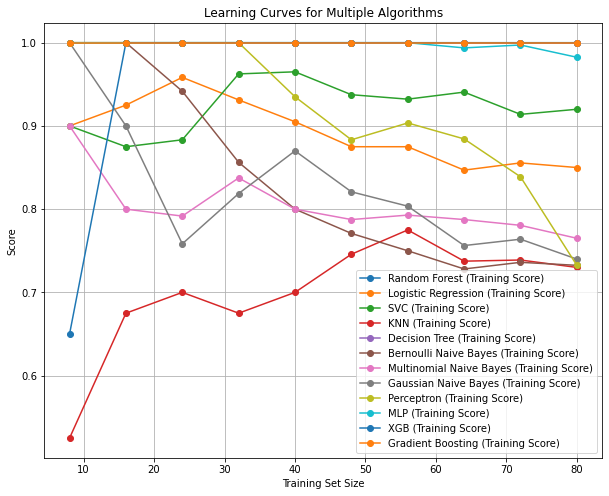

In [279]:
# Initialize the classifiers
classifiers = {
    'Random Forest': RandomForestClassifier(n_estimators=1000),
    'Logistic Regression': LogisticRegression(),
    'SVC': SVC(),
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Bernoulli Naive Bayes': BernoulliNB(),
    'Multinomial Naive Bayes': MultinomialNB(),
    'Gaussian Naive Bayes': GaussianNB(),
    'Perceptron': Perceptron(),
    'MLP': MLPClassifier(),
    'XGB': XGBClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
}

# Define the training set sizes
train_sizes = np.linspace(0.1, 1.0, 10)  # Adjust the range according to your needs

# Plot the learning curves for each classifier
plt.figure(figsize=(10, 8))
for clf_name, clf in classifiers.items():
    # Calculate the learning curve scores
    train_sizes, train_scores, test_scores = learning_curve(clf, X_train_scaled_oversampling, y_train_oversampling, train_sizes=train_sizes, cv=5, scoring='accuracy')

    # Calculate the mean of the training and test scores
    train_scores_mean = np.mean(train_scores, axis=1)
   

    # Plot the learning curve for the current classifier
    plt.plot(train_sizes, train_scores_mean, 'o-', label=f'{clf_name} (Training Score)')
   

# Customize the plot
plt.xlabel('Training Set Size')
plt.ylabel('Score')
plt.title('Learning Curves for Multiple Algorithms')
plt.legend(loc='best')
plt.grid(True)
plt.show()

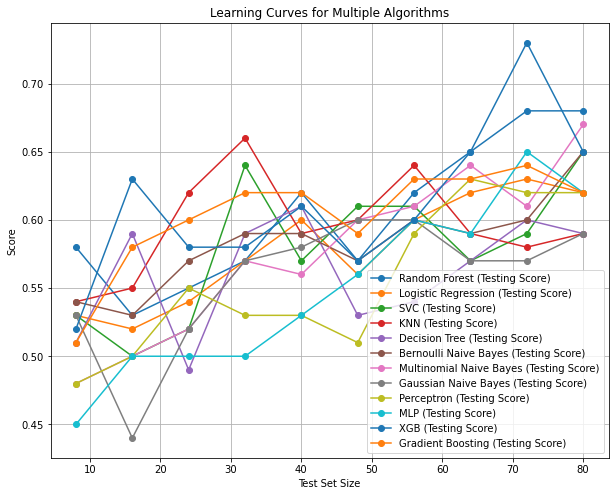

In [287]:
# Initialize the classifiers
classifiers = {
    'Random Forest': RandomForestClassifier(n_estimators=1000),
    'Logistic Regression': LogisticRegression(),
    'SVC': SVC(),
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Bernoulli Naive Bayes': BernoulliNB(),
    'Multinomial Naive Bayes': MultinomialNB(),
    'Gaussian Naive Bayes': GaussianNB(),
    'Perceptron': Perceptron(),
    'MLP': MLPClassifier(),
    'XGB': XGBClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
}

# Define the training set sizes
train_sizes = np.linspace(0.1, 1.0, 10)  # Adjust the range according to your needs

# Plot the learning curves for each classifier
plt.figure(figsize=(10, 8))
for clf_name, clf in classifiers.items():
    # Calculate the learning curve scores
    train_sizes, train_scores, test_scores = learning_curve(clf, X_train_scaled_oversampling, y_train_oversampling, train_sizes=train_sizes, cv=5, scoring='accuracy')

    # Calculate the mean of the training and test scores
    test_scores_mean = np.mean(test_scores, axis=1)
   

    # Plot the learning curve for the current classifier
    plt.plot(train_sizes, test_scores_mean, 'o-', label=f'{clf_name} (Testing Score)')
   

# Customize the plot
plt.xlabel('Test Set Size')
plt.ylabel('Score')
plt.title('Learning Curves for Multiple Algorithms')
plt.legend(loc='best')
plt.grid(True)
plt.show()

In [281]:
from sklearn.metrics import plot_roc_curve

ImportError: cannot import name 'plot_roc_curve' from 'sklearn.metrics' (F:\ANACON\lib\site-packages\sklearn\metrics\__init__.py)

In [ ]:
disp=plot_roc_curve(svc,X_test_scaled_oversampling,y_test_oversampling)
plot_roc_curve(classifier,X_test_scaled_oversampling,y_test_oversampling, ax=disp.ax_);
plot_roc_curve(BernNB,X_test_scaled_oversampling,y_test_oversampling, ax=disp.ax_);

# accuracy before and after feature engineering

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have the accuracies stored in dictionaries
classifiers = ['Zero R', 'Random Forest', 'Logistic Regression','KNN', 'XG-Boosting', 'Gradient Boosting','Decision Tree', 'Naive Bayes(Gaussian)', 'Naive Bayes(BernoulliNB)','Naive Bayes(Multinomial)','SVM','MLP','Perceptron','Ensemble (Voting classifier)','Ensemble (Bagging classifier)','Ensemble (ADA boost classifier)','Ensemble (Stacking classifier)']
accuracies_before = {'Zero R': 0.49, 'Random Forest': 0.93, 'Logistic Regression': 0.73,'KNN':0.74,'XG-Boosting': 0.89, 'Gradient Boosting':0.89,'Decision Tree':0.84, 'Naive Bayes(Gaussian)':0.69, 'Naive Bayes(BernoulliNB)':0.85,'Naive Bayes(Multinomial)':0.66,'SVM':0.89,'MLP':0.91,'Perceptron':0.70,'Ensemble (Voting classifier)':0.89,'Ensemble (Bagging classifier)':0.85,'Ensemble (ADA boost classifier)':0.81,'Ensemble (Stacking classifier)':0.93}
accuracies_after = {'Zero R': 0.49, 'Random Forest': 0.99, 'Logistic Regression': 0.88,'KNN':0.89,'XG-Boosting': 0.95, 'Gradient Boosting':0.93,'Decision Tree':0.95, 'Naive Bayes(Gaussian)':0.80, 'Naive Bayes(BernoulliNB)':0.88,'Naive Bayes(Multinomial)':0.76,'SVM':0.93,'MLP':0.91,'Perceptron':0.80,'Ensemble (Voting classifier)':0.92,'Ensemble (Bagging classifier)':0.92,'Ensemble (ADA boost classifier)':0.86,'Ensemble (Stacking classifier)':0.97}
# Create a list of x-axis values (e.g., classifier names)
x_values = np.arange(len(classifiers))

# Set the width of the bars
bar_width = 0.25

# Plot the accuracies
plt.bar(x_values, list(accuracies_before.values()), width=bar_width, tick_label=classifiers, label='Before', color='blue')
plt.bar(x_values + bar_width, list(accuracies_after.values()), width=bar_width, tick_label=classifiers, label='After', color='orange')

# Add labels and title to the plot
plt.xlabel('Classifiers')
plt.ylabel('Accuracy')
plt.title('Accuracies of Different Classifiers Before and After Feature Selection')

# Add a legend
plt.legend()

# Show the plot
plt.show()

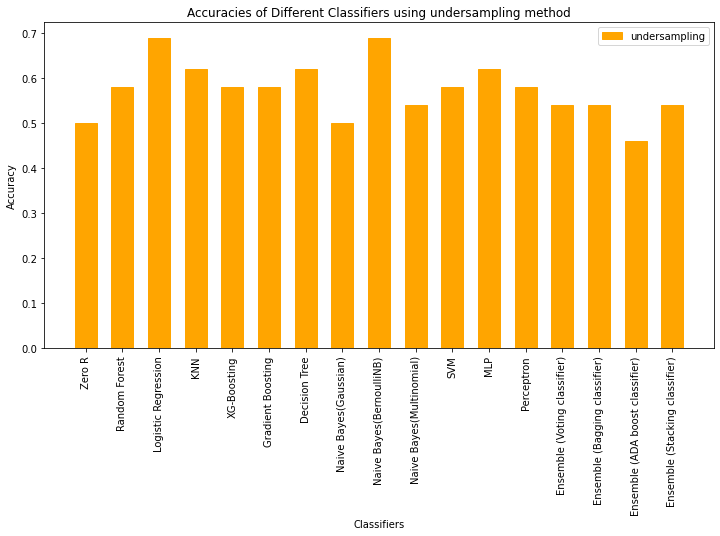

In [286]:
import numpy as np
import matplotlib.pyplot as plt

classifiers = ['Zero R', 'Random Forest', 'Logistic Regression','KNN', 'XG-Boosting', 'Gradient Boosting','Decision Tree', 'Naive Bayes(Gaussian)', 'Naive Bayes(BernoulliNB)','Naive Bayes(Multinomial)','SVM','MLP','Perceptron','Ensemble (Voting classifier)','Ensemble (Bagging classifier)','Ensemble (ADA boost classifier)','Ensemble (Stacking classifier)']
accuracies_before = {'Zero R': 0.50, 'Random Forest': 0.58, 'Logistic Regression': 0.69,'KNN':0.62,'XG-Boosting': 0.58, 'Gradient Boosting':0.58,'Decision Tree':0.62, 'Naive Bayes(Gaussian)':0.50, 'Naive Bayes(BernoulliNB)':0.69,'Naive Bayes(Multinomial)':0.54,'SVM':0.58,'MLP':0.62,'Perceptron':0.58,'Ensemble (Voting classifier)':0.54,'Ensemble (Bagging classifier)':0.54,'Ensemble (ADA boost classifier)':0.46,'Ensemble(Stacking)':0.54}

x_values = np.arange(len(classifiers))

# Set the width of the bars
bar_width = 0.6

# Set the figure size
plt.figure(figsize=(12, 6))

# Plot the accuracies
plt.bar(x_values - bar_width/2, list(accuracies_before.values()), width=bar_width, tick_label=classifiers, label='undersampling', color='orange',edgecolor = "orange")

# Add labels and title to the plot
plt.xlabel('Classifiers')
plt.ylabel('Accuracy')
plt.title('Accuracies of Different Classifiers using undersampling method')
plt.xticks(rotation=90)
# Add a legend
plt.legend()

# Show the plot
plt.show()
